# Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
applicationdf = pd.read_csv('application_record.csv')
creditdf = pd.read_csv('credit_record.csv')

# Credit Record file Processing

In [3]:
creditdf.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
creditdf.shape

(1048575, 3)

In [5]:
creditdf.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [6]:
creditdf.info() #status will need to be converted into dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
creditdf.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


##### C: paid off that month
##### X: No loan for the month
##### 0: 1-29 days past due 
##### 1: 30-59 days
##### 2: 60-89 days
##### 3: 90-119 days
##### 4: 120-149 days
##### 5: Overdue or bad debts, write-offs for more than 150 days

In [8]:
creditdf = creditdf.drop(creditdf[creditdf['STATUS']=='X'].index)
creditdf.reset_index(drop = True, inplace = True)

In [9]:
#map overdue to 1 and not overdue to 0
map_status_temp = {'C': 0, **dict.fromkeys([x for x in list(set(creditdf['STATUS'])) if x != 'C'], 1)}
creditdf['Bad_Client_temp'] = creditdf['STATUS'].map(map_status_temp)
#print('\033[1m'+'After mapping'+'\033[0m'+'\n', dfcredit['Bad_Client_temp'].value_counts())

creditdf['Bad_Client_size'] = creditdf['Bad_Client_temp']
df_Bad_Client_3 = creditdf[['ID','Bad_Client_temp', 'Bad_Client_size']].groupby('ID', as_index=False).agg({'Bad_Client_temp': 'sum', 'Bad_Client_size': 'size'})

df_Bad_Client_3['Bad_Client_ratio'] = df_Bad_Client_3[['Bad_Client_temp', 'Bad_Client_size']].apply(lambda x: (x['Bad_Client_temp'] / x['Bad_Client_size']) 
                                                                                                         if (x['Bad_Client_size'] >= 12) else (x['Bad_Client_temp'] / 12), axis = 1)
i = 1

df_Bad_Client_3['Bad_Client_3'] = df_Bad_Client_3['Bad_Client_ratio'].apply(lambda x: 1 if x > i/12 else 0)
print(df_Bad_Client_3['Bad_Client_3'].value_counts())

1    36452
0     4997
Name: Bad_Client_3, dtype: int64


# Application file processing
# Check basic info of Data

In [10]:
applicationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
applicationdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [12]:
applicationdf.shape

(438557, 18)

In [13]:
applicationdf.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [14]:
#Gender proportion in applicants
gender_propor = applicationdf.CODE_GENDER.value_counts(normalize = True)
gender_propor

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

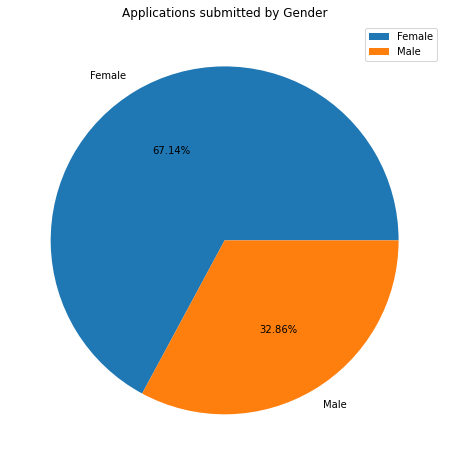

In [15]:
plt.figure(figsize = (8,8))
labels = ['Female','Male']
plt.pie(gender_propor, labels=labels, autopct='%.2f%%') # %.2f%% = show in % format
plt.title("Applications submitted by Gender")
plt.legend()
plt.show()

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


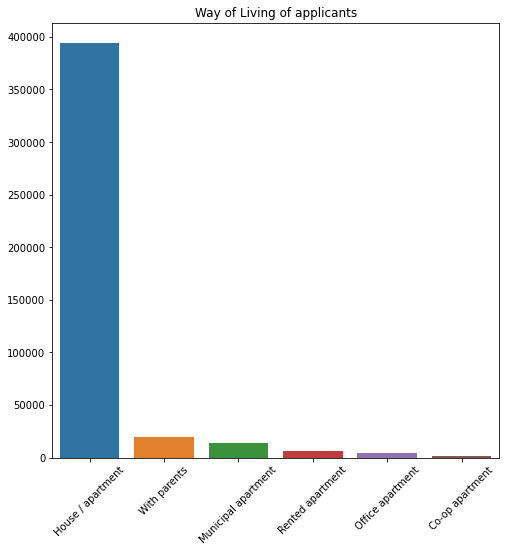

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(8,8))
sns.barplot(applicationdf.NAME_HOUSING_TYPE.value_counts().index, applicationdf.NAME_HOUSING_TYPE.value_counts().values)
plt.xticks(rotation=45)
plt.title('Way of Living of applicants')
plt.show()
plt.savefig('Way of Living.png', dpi=300, bbox_inches='tight')

In [17]:
house_ownership_gender = applicationdf.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID':'count'})

In [18]:
house_ownership_gender = house_ownership_gender.groupby(level=0).apply(lambda x: x/float(x.sum())*100)

In [19]:
house_ownership_gender #Females applicants have higher % of house ownership.

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

In [20]:
edu_type = applicationdf.groupby(['NAME_EDUCATION_TYPE']).AMT_INCOME_TOTAL.mean().sort_values(ascending=False)
edu_type

NAME_EDUCATION_TYPE
Academic degree                  240692.307692
Higher education                 226106.872502
Incomplete higher                207331.018315
Secondary / secondary special    172056.654071
Lower secondary                  143933.865218
Name: AMT_INCOME_TOTAL, dtype: float64

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


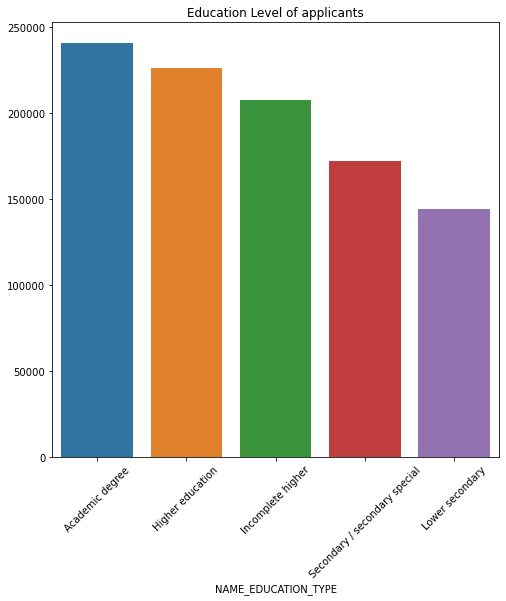

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(edu_type.index, edu_type.values)
plt.xticks(rotation=45)
plt.title('Education Level of applicants')
plt.show()
plt.savefig('Education level of applicants.png', dpi=300, bbox_inches='tight')
# Higher education Higher avg income
# Most of them has completed seconary school level or above

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


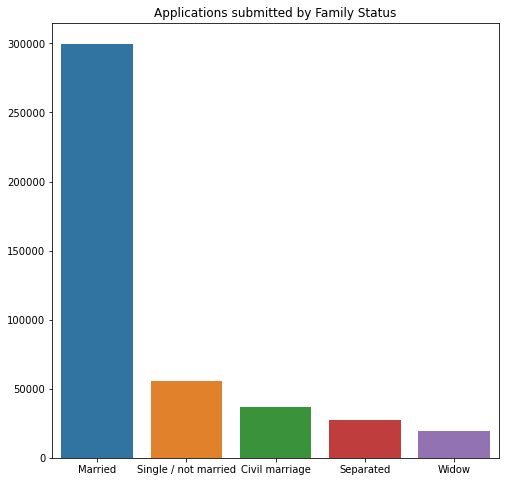

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(8,8))
sns.barplot(applicationdf['NAME_FAMILY_STATUS'].value_counts().index, applicationdf['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('Applications submitted by Family Status')
plt.show()
plt.savefig('Applications submitted by fam status.png', dpi=300, bbox_inches='tight')
# majority of applicatant's are married

In [23]:
applicationdf.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

# Numerical and Categorical Variable Processing

In [24]:
applicationdf['Work_Year'] = applicationdf['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else round(-x/365.25))

In [25]:
applicationdf['Work_Year'].max()

48

In [26]:
bin = [0,2,5,10,15,49]
labels = ['0','2-5','5-10','10-15','15-50']
cats = pd.cut(applicationdf['Work_Year'],bin,labels=labels,right=False)
applicationdf['Work_Year'] = cats

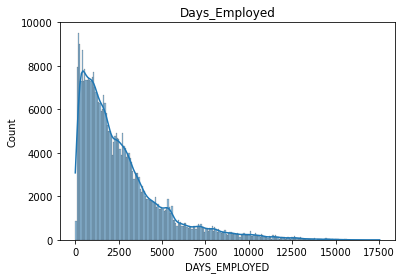

<Figure size 432x288 with 0 Axes>

In [27]:
g = sns.histplot(-(applicationdf['DAYS_EMPLOYED'][(applicationdf['DAYS_EMPLOYED']<0)]),kde=True)
g.set(ylim=(0, 10000))
plt.title('Days_Employed')
plt.show()
plt.savefig('Days_Employed.png', dpi=300, bbox_inches='tight')

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


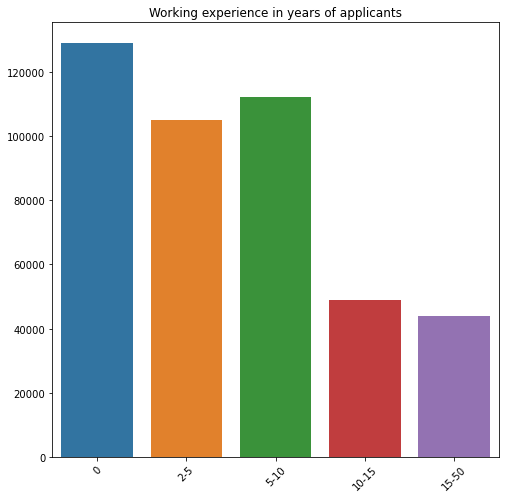

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize = (8,8))
sns.barplot(applicationdf['Work_Year'].value_counts().index, applicationdf['Work_Year'].value_counts().values)
plt.xticks(rotation=45)
plt.title('Working experience in years of applicants')
plt.show()
plt.savefig('Work exp.png', dpi=300, bbox_inches='tight')

# shows  year of working exp is the most common group of applicants

In [29]:
applicationdf['Male'] = applicationdf['CODE_GENDER'].apply(lambda x: 1 if x == 'M' else 0)
applicationdf['Car'] = applicationdf['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)
applicationdf['Property'] = applicationdf['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)
applicationdf['Income_from_Working'] = applicationdf['NAME_INCOME_TYPE'].apply(lambda x: 1 if ((x == 'Working') or (x == 'Commercial associate') or (x == 'State servant')) else 0)
applicationdf['Higher_Education'] = applicationdf['NAME_EDUCATION_TYPE'].apply(lambda x: 1 if ((x == 'Higher education') or (x == 'Academic degree')) else 0)
applicationdf['Married'] = applicationdf['NAME_FAMILY_STATUS'].apply(lambda x: 1 if ((x == 'Married') or (x == 'Civil marriage')) else 0)
applicationdf['Live_with_Parent'] = applicationdf['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x == 'With parents' else 0)
applicationdf['Age'] = applicationdf['DAYS_BIRTH'].apply(lambda x: round(-x/365.25))
applicationdf['Working'] = applicationdf['DAYS_EMPLOYED'].apply(lambda x: 1 if x < 0 else 0)
applicationdf['Year_of_Working'] = applicationdf['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else round(-x/365.25))
applicationdf['Professional'] = applicationdf['OCCUPATION_TYPE'].apply(lambda x: 1 if ((x == 'Core staff') or (x == 'Managers') or (x == 'High skill tech staff')
                                                                                      or (x == 'Accountants') or (x == 'Medicine staff') or (x == 'IT staff')) else 0)

cut_income = [np.min(applicationdf['AMT_INCOME_TOTAL']),100000, 200000, 300000, np.max(applicationdf['AMT_INCOME_TOTAL'])+1]
applicationdf['Annual_Income'] = pd.cut(applicationdf['AMT_INCOME_TOTAL'], cut_income,include_lowest=True)

cut_age = [np.min(applicationdf['Age']), 35, 50, 60, np.max(applicationdf['Age'])+1]
applicationdf['Age_Group'] = pd.cut(applicationdf['Age'], cut_age,include_lowest=True)

#cut_age = [np.min(applicationdf['Year_of_Working']),0.00000000000000001, 2, 5, 10, 15, np.max(applicationdf['Year_of_Working'])+1]
#applicationdf['Work_Year'] = pd.cut(applicationdf['Year_of_Working'], cut_age,include_lowest=True)

applicationdf['With_Child'] = applicationdf['CNT_CHILDREN'].apply(lambda x: 0 if x == 0 else 1)


In [30]:
applicationdf.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Work_Year', 'Male',
       'Car', 'Property', 'Income_from_Working', 'Higher_Education', 'Married',
       'Live_with_Parent', 'Age', 'Working', 'Year_of_Working', 'Professional',
       'Annual_Income', 'Age_Group', 'With_Child'],
      dtype='object')

In [31]:
pd.set_option('display.max_columns',None)

In [32]:
applicationdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Work_Year,Male,Car,Property,Income_from_Working,Higher_Education,Married,Live_with_Parent,Age,Working,Year_of_Working,Professional,Annual_Income,Age_Group,With_Child
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,10-15,1,1,1,1,1,1,0,33,1,12,0,"(300000.0, 6750001.0]","(20.999, 35.0]",0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,10-15,1,1,1,1,1,1,0,33,1,12,0,"(300000.0, 6750001.0]","(20.999, 35.0]",0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,2-5,1,1,1,1,0,1,0,59,1,3,0,"(100000.0, 200000.0]","(50.0, 60.0]",0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5-10,0,0,1,1,0,0,0,52,1,8,0,"(200000.0, 300000.0]","(50.0, 60.0]",0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5-10,0,0,1,1,0,0,0,52,1,8,0,"(200000.0, 300000.0]","(50.0, 60.0]",0


# Data Partition

In [33]:
dfapplication_combined = applicationdf.merge(df_Bad_Client_3, how='left', on='ID', validate='many_to_one')

In [34]:
(dfapplication_combined['Working'] == 0).sum()

75329

In [35]:
dfapplication_combined['OCCUPATION_TYPE'].isnull().sum()

134203

In [36]:
dfapplication_combined.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Work_Year,Male,Car,Property,Income_from_Working,Higher_Education,Married,Live_with_Parent,Age,Working,Year_of_Working,Professional,Annual_Income,Age_Group,With_Child,Bad_Client_temp,Bad_Client_size,Bad_Client_ratio,Bad_Client_3
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,10-15,1,1,1,1,1,1,0,33,1,12,0,"(300000.0, 6750001.0]","(20.999, 35.0]",0,2.0,15.0,0.133333,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,10-15,1,1,1,1,1,1,0,33,1,12,0,"(300000.0, 6750001.0]","(20.999, 35.0]",0,2.0,14.0,0.142857,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,2-5,1,1,1,1,0,1,0,59,1,3,0,"(100000.0, 200000.0]","(50.0, 60.0]",0,7.0,14.0,0.500000,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5-10,0,0,1,1,0,0,0,52,1,8,0,"(200000.0, 300000.0]","(50.0, 60.0]",0,2.0,2.0,0.166667,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5-10,0,0,1,1,0,0,0,52,1,8,0,"(200000.0, 300000.0]","(50.0, 60.0]",0,NaN,NaN,NaN,NaN


In [37]:
df_to_use = dfapplication_combined.drop(dfapplication_combined[dfapplication_combined['Bad_Client_3'].isnull()].index)
df_to_use = df_to_use.drop_duplicates('ID', keep='first').reset_index(drop = True)
print(df_to_use.shape)

(33110, 37)


# Review the dataset again

In [38]:
df_to_use.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        10373
CNT_FAM_MEMBERS            0
Work_Year                  0
Male                       0
Car                        0
Property                   0
Income_from_Working        0
Higher_Education           0
Married                    0
Live_with_Parent           0
Age                        0
Working                    0
Year_of_Working            0
Professional               0
Annual_Income              0
Age_Group                  0
With_Child                 0
Bad_Client_temp            0
Bad_Client_siz

<AxesSubplot:>

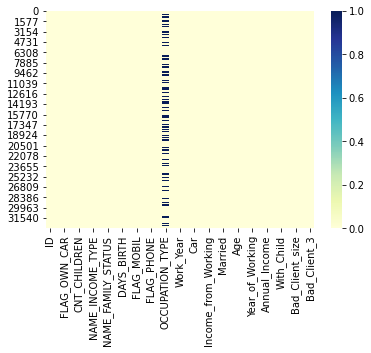

In [39]:
sns.heatmap(df_to_use.isnull(),cmap="YlGnBu") 
#shows that occupation_type has a lot of null values 

# Remove Outliers

In [40]:
df_to_use.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Work_Year', 'Male',
       'Car', 'Property', 'Income_from_Working', 'Higher_Education', 'Married',
       'Live_with_Parent', 'Age', 'Working', 'Year_of_Working', 'Professional',
       'Annual_Income', 'Age_Group', 'With_Child', 'Bad_Client_temp',
       'Bad_Client_size', 'Bad_Client_ratio', 'Bad_Client_3'],
      dtype='object')

In [41]:
X_list = ['Male', 'Car', 'Property', 'Income_from_Working', 'Higher_Education', 'Married', 'Live_with_Parent', 'Age', 'Working', 'Year_of_Working', 
          'Professional', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL'] # column we going to use

<AxesSubplot:xlabel='ID', ylabel='Male'>

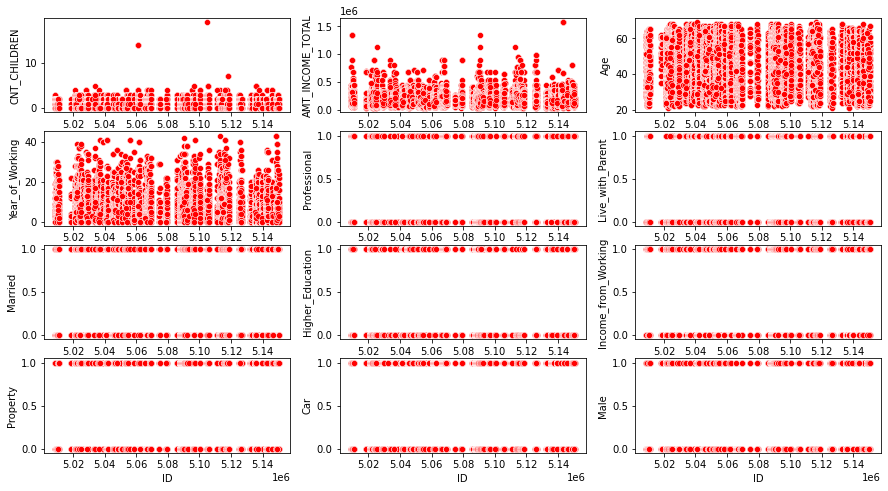

In [42]:
fig, ax= plt.subplots(nrows= 4, ncols = 3, figsize= (15,8))


sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df_to_use, ax=ax[0][0], color='red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df_to_use, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='Age', data=df_to_use, ax=ax[0][2], color='red')
sns.scatterplot(x='ID', y='Year_of_Working', data=df_to_use, ax=ax[1][0], color='red')
sns.scatterplot(x='ID', y='Professional', data=df_to_use, ax=ax[1][1], color='red')
sns.scatterplot(x='ID', y='Live_with_Parent', data=df_to_use, ax=ax[1][2], color='red')
sns.scatterplot(x='ID', y='Married', data=df_to_use, ax=ax[2][0], color='red')
sns.scatterplot(x='ID', y='Higher_Education', data=df_to_use, ax=ax[2][1], color='red')
sns.scatterplot(x='ID', y='Income_from_Working', data=df_to_use, ax=ax[2][2], color= 'red')
sns.scatterplot(x='ID', y='Property', data=df_to_use, ax=ax[3][0], color= 'red')
sns.scatterplot(x='ID', y='Car', data=df_to_use, ax=ax[3][1], color= 'red')
sns.scatterplot(x='ID', y='Male', data=df_to_use, ax=ax[3][2], color= 'red')

# we found that cnt children has outliers

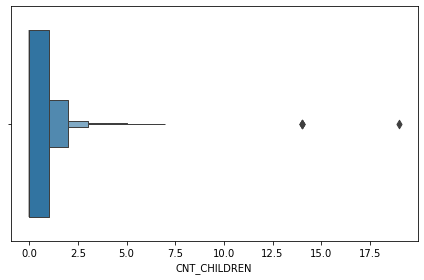

In [43]:
#fig, ax =plt.subplots(1,1, figsize=(19,5))
#sns.boxenplot(data=df_to_use, x='AMT_INCOME_TOTAL', hue='Bad_Client_3',ax=ax[0])
sns.boxenplot(data=df_to_use, x='CNT_CHILDREN', hue='Bad_Client_3') # ,ax=ax[1]
plt.tight_layout()  
plt.show()

# specific looking at the two columns with outliers

In [44]:
df_to_use.shape

(33110, 37)

In [45]:
upperbound = df_to_use['CNT_CHILDREN'].quantile(0.999)
df_to_use= df_to_use[(df_to_use['CNT_CHILDREN']<upperbound)]

In [46]:
df_to_use.shape

(33037, 37)

<AxesSubplot:xlabel='ID', ylabel='Male'>

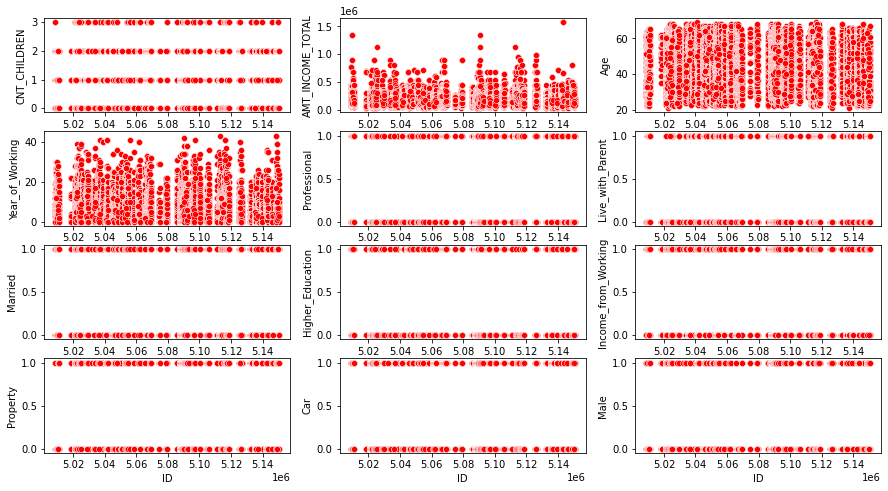

In [47]:
#recheck outliers
fig, ax= plt.subplots(nrows= 4, ncols = 3, figsize= (15,8))


sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df_to_use, ax=ax[0][0], color='red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df_to_use, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='Age', data=df_to_use, ax=ax[0][2], color='red')
sns.scatterplot(x='ID', y='Year_of_Working', data=df_to_use, ax=ax[1][0], color='red')
sns.scatterplot(x='ID', y='Professional', data=df_to_use, ax=ax[1][1], color='red')
sns.scatterplot(x='ID', y='Live_with_Parent', data=df_to_use, ax=ax[1][2], color='red')
sns.scatterplot(x='ID', y='Married', data=df_to_use, ax=ax[2][0], color='red')
sns.scatterplot(x='ID', y='Higher_Education', data=df_to_use, ax=ax[2][1], color='red')
sns.scatterplot(x='ID', y='Income_from_Working', data=df_to_use, ax=ax[2][2], color= 'red')
sns.scatterplot(x='ID', y='Property', data=df_to_use, ax=ax[3][0], color= 'red')
sns.scatterplot(x='ID', y='Car', data=df_to_use, ax=ax[3][1], color= 'red')
sns.scatterplot(x='ID', y='Male', data=df_to_use, ax=ax[3][2], color= 'red')

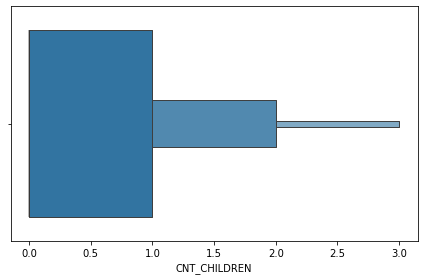

In [48]:
#fig, ax =plt.subplots(1,2, figsize=(19,5))
#sns.boxenplot(data=df_to_use, x='AMT_INCOME_TOTAL', hue='Bad_Client_3',ax=ax[0])
sns.boxenplot(data=df_to_use, x='CNT_CHILDREN', hue='Bad_Client_3')
plt.tight_layout()  
plt.show()

# specific looking at the two columns with outliers --> RECHECK --> DONE

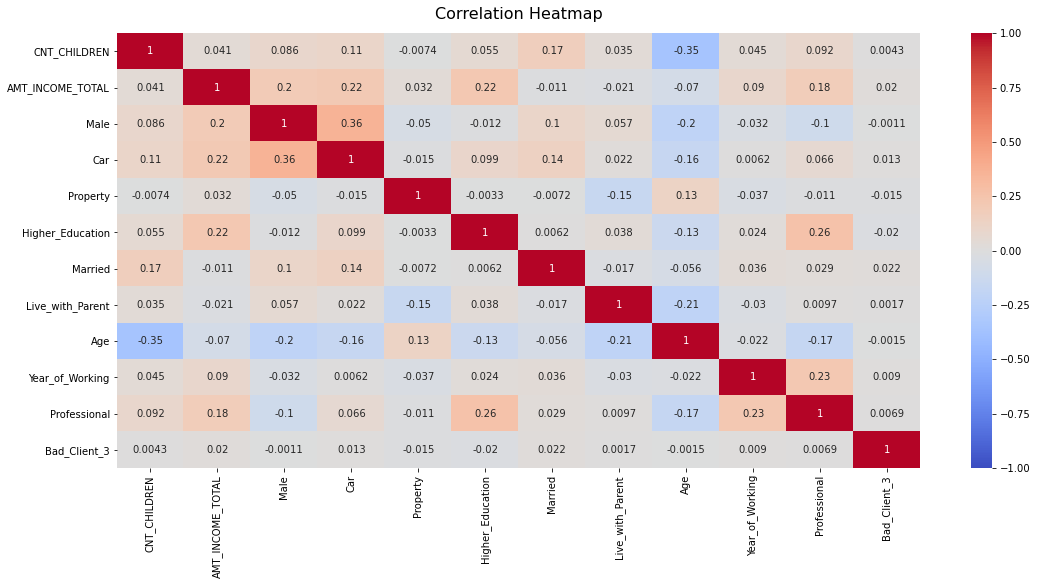

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(18, 8))

heatmap1 = sns.heatmap(df_to_use.drop(['ID','DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'Working',
                            'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'Income_from_Working', 'With_Child',
                           'Bad_Client_temp', 'Bad_Client_size', 'Bad_Client_ratio'],axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14);
plt.show()
plt.savefig('heatmap1.png', dpi=300, bbox_inches='tight')

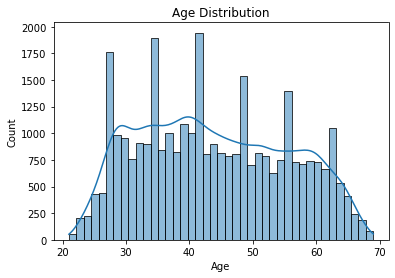

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


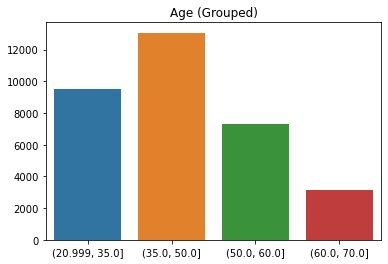

<Figure size 432x288 with 0 Axes>

In [50]:
sns.histplot(df_to_use['Age'],kde=True)
plt.title('Age Distribution')
plt.show()
plt.savefig('Age Dist.png', dpi=300, bbox_inches='tight')

sns.barplot(df_to_use['Age_Group'].value_counts().index, df_to_use['Age_Group'].value_counts().values)
plt.title('Age (Grouped)')
plt.show()
plt.savefig('Age Grouped.png', dpi=300, bbox_inches='tight')

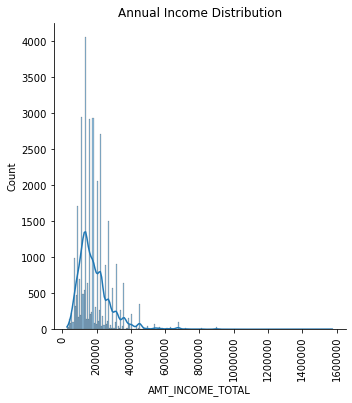

<Figure size 576x576 with 0 Axes>

In [51]:
from matplotlib.pyplot import ticklabel_format

a = sns.displot(df_to_use['AMT_INCOME_TOTAL'],kde=True)
plt.ticklabel_format(useOffset = False)
plt.xticks(rotation=90)
plt.title('Annual Income Distribution')
plt.ticklabel_format(style='plain')
plt.figure(figsize=(8,8))

plt.show()

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


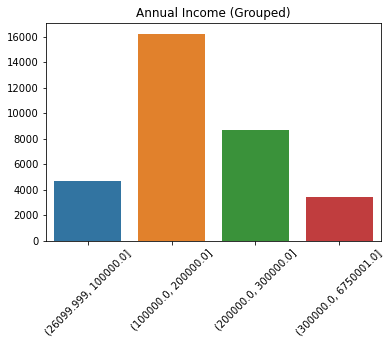

<Figure size 432x288 with 0 Axes>

In [52]:
sns.barplot(df_to_use['Annual_Income'].value_counts().index, df_to_use['Annual_Income'].value_counts().values)
plt.title('Annual Income (Grouped)')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Annual Income grouped.png', dpi=300, bbox_inches='tight')

In [53]:
chartdf = df_to_use.drop(['ID','DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'Working', 'Male', 'Car', 'Property', 'NAME_INCOME_TYPE', 
                'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'Income_from_Working', 'With_Child',
                'Bad_Client_temp', 'Bad_Client_size', 'Bad_Client_ratio', 'Annual_Income', 'Age_Group', 'Work_Year', 'Bad_Client_3'],axis=1)
chartdf.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'Higher_Education', 'Married',
       'Live_with_Parent', 'Age', 'Year_of_Working', 'Professional'],
      dtype='object')

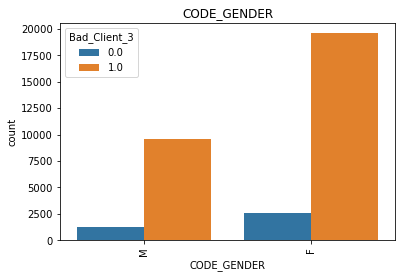

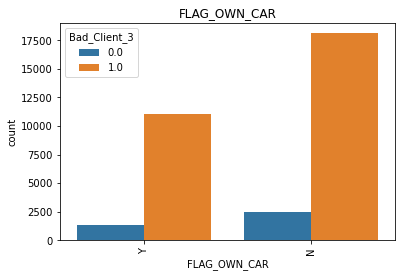

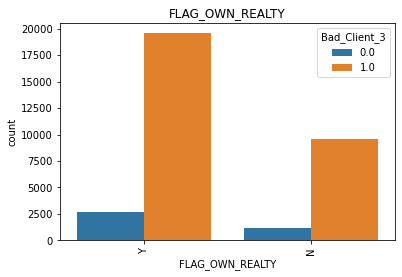

<Figure size 432x288 with 0 Axes>

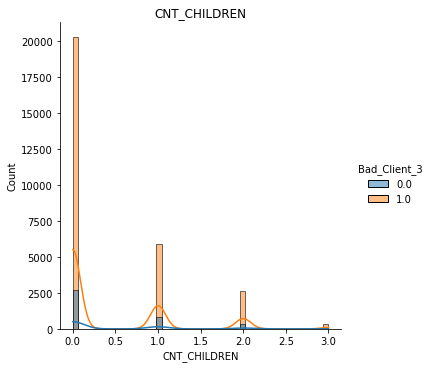

<Figure size 432x288 with 0 Axes>

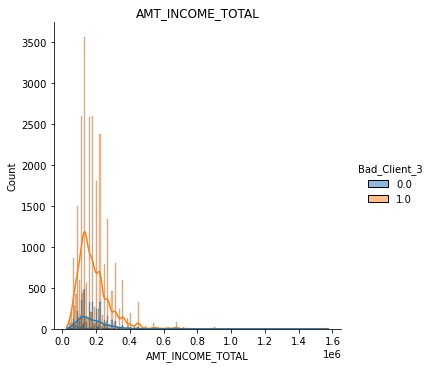

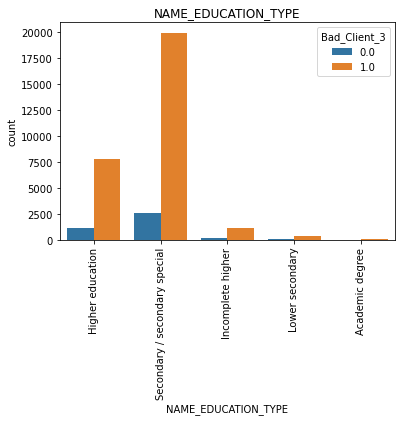

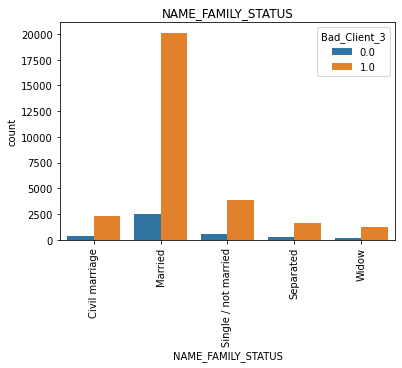

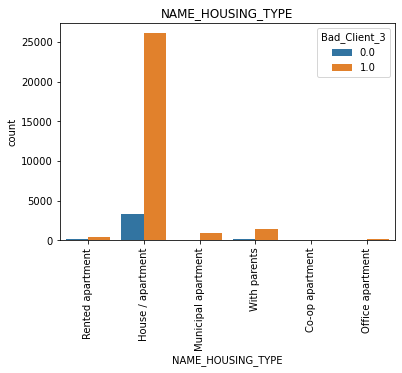

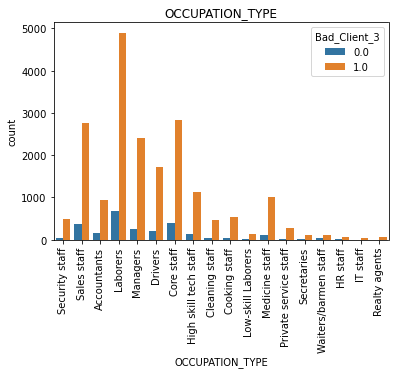

<Figure size 432x288 with 0 Axes>

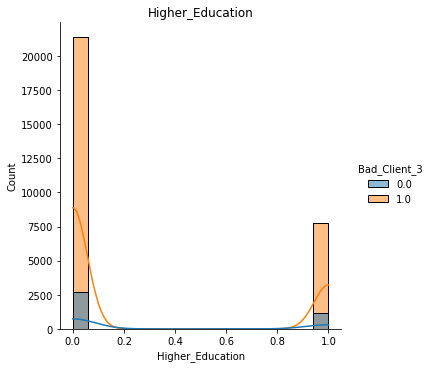

<Figure size 432x288 with 0 Axes>

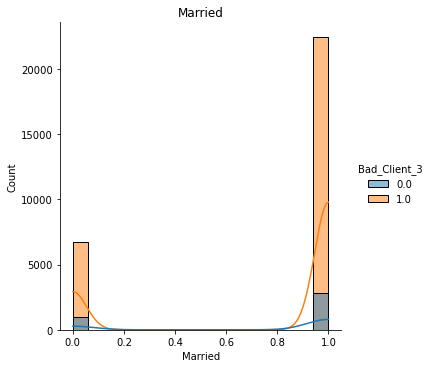

<Figure size 432x288 with 0 Axes>

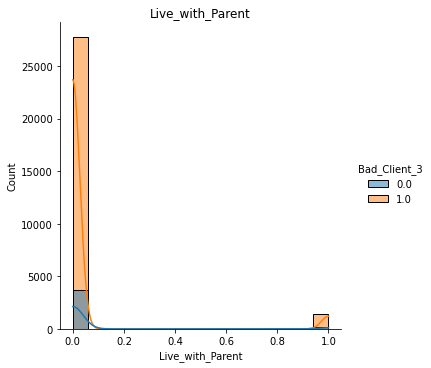

<Figure size 432x288 with 0 Axes>

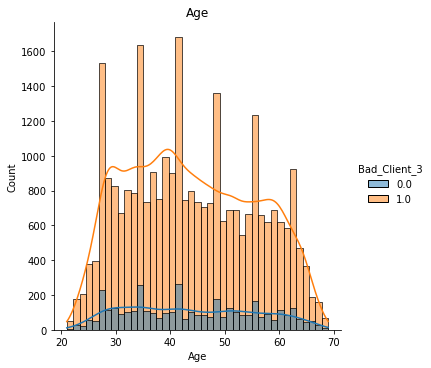

<Figure size 432x288 with 0 Axes>

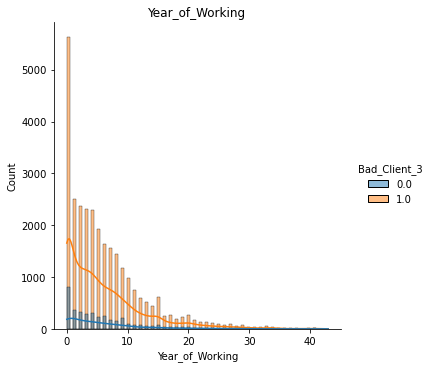

<Figure size 432x288 with 0 Axes>

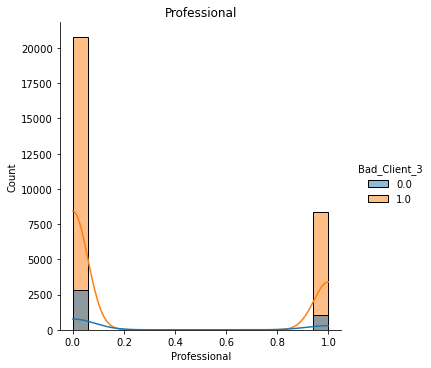

<Figure size 432x288 with 0 Axes>

In [54]:
for col in df_to_use.drop(['ID','DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'Working', 'Male', 'Car', 'Property', 'NAME_INCOME_TYPE', 
                'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'Income_from_Working', 'With_Child',
                'Bad_Client_temp', 'Bad_Client_size', 'Bad_Client_ratio', 'Annual_Income', 'Age_Group', 'Work_Year', 'Bad_Client_3'],axis=1).columns:
    if (df_to_use[col].dtypes == 'object'):
        sns.countplot(x=col, hue='Bad_Client_3', data=df_to_use)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.show()
    else:
        sns.displot(x=col, hue='Bad_Client_3', data=df_to_use,kde=True)
        plt.title(col)
        plt.show()
    plt.savefig('{}.png'.format(col))
    

# Data Balancing

In [55]:
df_to_use['Bad_Client_3'].value_counts()

1.0    29172
0.0     3865
Name: Bad_Client_3, dtype: int64

In [56]:
df_to_use[df_to_use['Bad_Client_3']==0].shape

(3865, 37)

In [57]:
df_to_use[df_to_use['Bad_Client_3']==1].shape

(29172, 37)

In [58]:
df_class1 = df_to_use[df_to_use['Bad_Client_3']==0].sample((df_to_use['Bad_Client_3']==1).sum(), replace=True)
balanced_df = pd.concat([df_to_use[df_to_use["Bad_Client_3"]==1], df_class1], axis = 0)
balanced_df['Bad_Client_3'].value_counts()

0.0    29172
1.0    29172
Name: Bad_Client_3, dtype: int64

In [59]:
balanced_df.shape

(58344, 37)

/Users/jeffielkn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bad_Client_3', ylabel='count'>

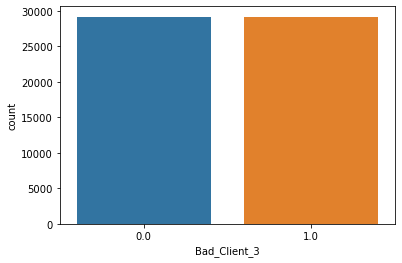

In [60]:
sns.countplot(balanced_df['Bad_Client_3']) #get a balanced chart of 0 and 1 then we can proceed to splitting the data

In [61]:
balanced_df.columns.tolist()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'Work_Year',
 'Male',
 'Car',
 'Property',
 'Income_from_Working',
 'Higher_Education',
 'Married',
 'Live_with_Parent',
 'Age',
 'Working',
 'Year_of_Working',
 'Professional',
 'Annual_Income',
 'Age_Group',
 'With_Child',
 'Bad_Client_temp',
 'Bad_Client_size',
 'Bad_Client_ratio',
 'Bad_Client_3']

In [62]:
dummies = pd.get_dummies(balanced_df[['Age_Group', 'Work_Year','Annual_Income']], drop_first=True)

In [63]:
balanced_df = pd.concat([balanced_df, dummies], axis = 1)

In [64]:
print(balanced_df.shape)
list(balanced_df.columns)

(58344, 47)


['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'Work_Year',
 'Male',
 'Car',
 'Property',
 'Income_from_Working',
 'Higher_Education',
 'Married',
 'Live_with_Parent',
 'Age',
 'Working',
 'Year_of_Working',
 'Professional',
 'Annual_Income',
 'Age_Group',
 'With_Child',
 'Bad_Client_temp',
 'Bad_Client_size',
 'Bad_Client_ratio',
 'Bad_Client_3',
 'Age_Group_(35.0, 50.0]',
 'Age_Group_(50.0, 60.0]',
 'Age_Group_(60.0, 70.0]',
 'Work_Year_2-5',
 'Work_Year_5-10',
 'Work_Year_10-15',
 'Work_Year_15-50',
 'Annual_Income_(100000.0, 200000.0]',
 'Annual_Income_(200000.0, 300000.0]',
 'Annual_Income_(300000.0, 6750001.0]']

In [65]:
Analyzelst = ['Bad_Client_3', 'Male', 'Car', 'Property', 'Income_from_Working', 'Higher_Education', 'Married', 'Live_with_Parent', 'Working',
              'Professional', 'With_Child', 'Age_Group_(35.0, 50.0]', 'Age_Group_(50.0, 60.0]', 
              'Age_Group_(60.0, 70.0]', 'Work_Year_2-5','Work_Year_5-10','Work_Year_10-15','Work_Year_15-50', 'Annual_Income_(100000.0, 200000.0]', 
              'Annual_Income_(200000.0, 300000.0]', 'Annual_Income_(300000.0, 6750001.0]']

In [66]:
final_df = balanced_df[Analyzelst].set_index(balanced_df.ID) # make it simple for reference only

In [67]:
final_df

,Bad_Client_3,Male,Car,Property,Income_from_Working,Higher_Education,Married,Live_with_Parent,Working,Professional,With_Child,"Age_Group_(35.0, 50.0]","Age_Group_(50.0, 60.0]","Age_Group_(60.0, 70.0]",Work_Year_2-5,Work_Year_5-10,Work_Year_10-15,Work_Year_15-50,"Annual_Income_(100000.0, 200000.0]","Annual_Income_(200000.0, 300000.0]","Annual_Income_(300000.0, 6750001.0]"
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1.0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5008805,1.0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5008806,1.0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
5008808,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
5008810,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117664,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5061221,0.0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
5116236,0.0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0


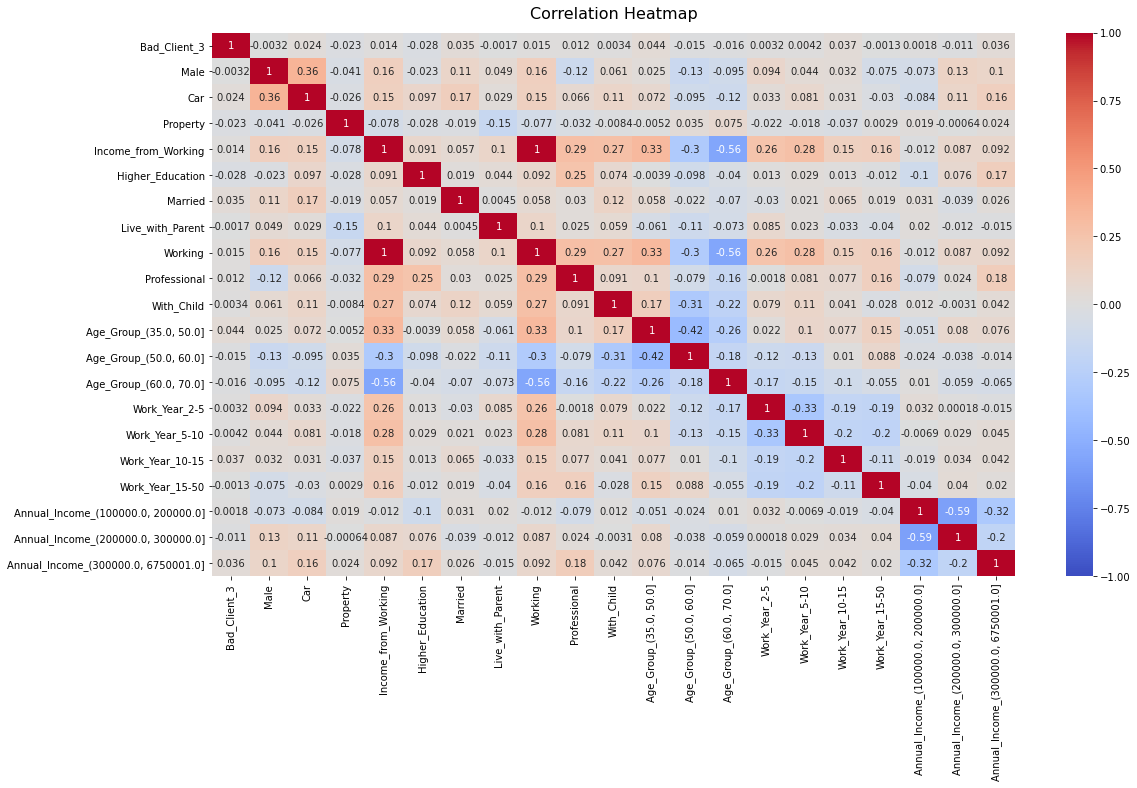

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize = (18,10))
heatmap2 = sns.heatmap(final_df.corr(),vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap2.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14);
plt.show()
plt.savefig('heatmap2.png', dpi=300, bbox_inches='tight')

In [69]:
balanced_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Work_Year,Male,Car,Property,Income_from_Working,Higher_Education,Married,Live_with_Parent,Age,Working,Year_of_Working,Professional,Annual_Income,Age_Group,With_Child,Bad_Client_temp,Bad_Client_size,Bad_Client_ratio,Bad_Client_3,"Age_Group_(35.0, 50.0]","Age_Group_(50.0, 60.0]","Age_Group_(60.0, 70.0]",Work_Year_2-5,Work_Year_5-10,Work_Year_10-15,Work_Year_15-50,"Annual_Income_(100000.0, 200000.0]","Annual_Income_(200000.0, 300000.0]","Annual_Income_(300000.0, 6750001.0]"
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,10-15,1,1,1,1,1,1,0,33,1,12,0,"(300000.0, 6750001.0]","(20.999, 35.0]",0,2.0,15.0,0.133333,1.0,0,0,0,0,0,1,0,0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,10-15,1,1,1,1,1,1,0,33,1,12,0,"(300000.0, 6750001.0]","(20.999, 35.0]",0,2.0,14.0,0.142857,1.0,0,0,0,0,0,1,0,0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,2-5,1,1,1,1,0,1,0,59,1,3,0,"(100000.0, 200000.0]","(50.0, 60.0]",0,7.0,14.0,0.500000,1.0,0,1,0,1,0,0,0,1,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5-10,0,0,1,1,0,0,0,52,1,8,0,"(200000.0, 300000.0]","(50.0, 60.0]",0,2.0,2.0,0.166667,1.0,0,1,0,0,1,0,0,0,1,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5-10,0,0,1,1,0,0,0,52,1,8,0,"(200000.0, 300000.0]","(50.0, 60.0]",0,6.0,21.0,0.285714,1.0,0,1,0,0,1,0,0,0,1,0


In [70]:
X = final_df.drop(['Bad_Client_3'],axis=1)
y = final_df['Bad_Client_3']

In [71]:
# SPLIT THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

# Overall Comparison

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=18),
    "DecisionTree" : DecisionTreeClassifier(random_state=18),
    "RandomForest" : RandomForestClassifier(random_state=18),
}

In [73]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = classifier.score(X_test, y_test)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

# Obviously logistic regression is comparatively not the best model to apply in this dataset.

[0.5355115158007498, 0.7406106052490626, 0.7406106052490626]
[0.5374925014997001, 0.7230268232067872, 0.7247407661324878]


# Logistic Regression Model

In [74]:
final_df

,Bad_Client_3,Male,Car,Property,Income_from_Working,Higher_Education,Married,Live_with_Parent,Working,Professional,With_Child,"Age_Group_(35.0, 50.0]","Age_Group_(50.0, 60.0]","Age_Group_(60.0, 70.0]",Work_Year_2-5,Work_Year_5-10,Work_Year_10-15,Work_Year_15-50,"Annual_Income_(100000.0, 200000.0]","Annual_Income_(200000.0, 300000.0]","Annual_Income_(300000.0, 6750001.0]"
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1.0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5008805,1.0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5008806,1.0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
5008808,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
5008810,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117664,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5061221,0.0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
5116236,0.0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0


In [75]:
Analyzelst

['Bad_Client_3',
 'Male',
 'Car',
 'Property',
 'Income_from_Working',
 'Higher_Education',
 'Married',
 'Live_with_Parent',
 'Working',
 'Professional',
 'With_Child',
 'Age_Group_(35.0, 50.0]',
 'Age_Group_(50.0, 60.0]',
 'Age_Group_(60.0, 70.0]',
 'Work_Year_2-5',
 'Work_Year_5-10',
 'Work_Year_10-15',
 'Work_Year_15-50',
 'Annual_Income_(100000.0, 200000.0]',
 'Annual_Income_(200000.0, 300000.0]',
 'Annual_Income_(300000.0, 6750001.0]']

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
LR_model = LogisticRegression(random_state=18).fit(X_train, y_train)

In [79]:
# get estimated coefficients
LR_model.coef_

array([[-0.08373254,  0.08270352, -0.10029843, -1.09143832, -0.17569962,
         0.12619078,  0.00647261,  0.92629522,  0.02973525, -0.03412075,
         0.13818492, -0.04541971, -0.07579696,  0.15646975,  0.11556509,
         0.30273711,  0.08562529,  0.10357544,  0.06061193,  0.34403594]])

In [80]:
list(final_df.columns)[i]

'Male'

In [81]:
lrlist = LR_model.coef_.tolist()[0]

In [82]:
coefdf = pd.DataFrame({'Feature': list(X.columns), 'Coefficent': lrlist}).sort_values('Coefficent', ascending = False)

print (coefdf)

                                Feature  Coefficent
7                               Working    0.926295
19  Annual_Income_(300000.0, 6750001.0]    0.344036
15                      Work_Year_10-15    0.302737
13                        Work_Year_2-5    0.156470
10               Age_Group_(35.0, 50.0]    0.138185
5                               Married    0.126191
14                       Work_Year_5-10    0.115565
17   Annual_Income_(100000.0, 200000.0]    0.103575
16                      Work_Year_15-50    0.085625
1                                   Car    0.082704
18   Annual_Income_(200000.0, 300000.0]    0.060612
8                          Professional    0.029735
6                      Live_with_Parent    0.006473
9                            With_Child   -0.034121
11               Age_Group_(50.0, 60.0]   -0.045420
12               Age_Group_(60.0, 70.0]   -0.075797
0                                  Male   -0.083733
2                              Property   -0.100298
4           

In [83]:
# get intercept
LR_model.intercept_

array([-0.08236712])

In [84]:
from sklearn import metrics
import scikitplot as skplt

In [85]:
# Predict class labels and class probabilities for samples in X_test.
y_pred = LR_model.predict(X_test)
y_pred_prob = LR_model.predict_proba(X_test)

In [86]:
y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [87]:
y_pred_prob

array([[0.49957976, 0.50042024],
       [0.5310873 , 0.4689127 ],
       [0.56169939, 0.43830061],
       ...,
       [0.41594418, 0.58405582],
       [0.5642583 , 0.4357417 ],
       [0.55888276, 0.44111724]])

In [88]:
y_pred_prob.shape

(11669, 2)

In [89]:
LR_model.score(X_test,y_test)

0.5374925014997001

# Model Assessment
### Logistic Regression

In [90]:
metrics.confusion_matrix(y_test, y_pred)

array([[3265, 2599],
       [2798, 3007]])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

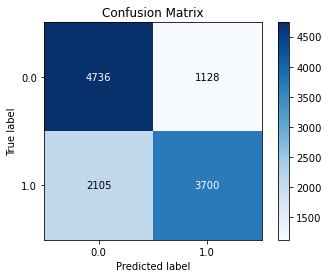

In [125]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [92]:
# Precision, Recall, F1 score
metrics.precision_score(y_test, y_pred)

0.5363895825900821

In [93]:
metrics.recall_score(y_test, y_pred)

0.5180017226528855

In [94]:
metrics.f1_score(y_test,y_pred)

0.5270353167995793

In [95]:
metrics.precision_recall_fscore_support(y_test,y_pred,average='binary')

(0.5363895825900821, 0.5180017226528855, 0.5270353167995793, None)

In [96]:
y_test.value_counts()

0.0    5864
1.0    5805
Name: Bad_Client_3, dtype: int64

In [97]:
metrics.accuracy_score(y_test, y_pred)

0.5374925014997001

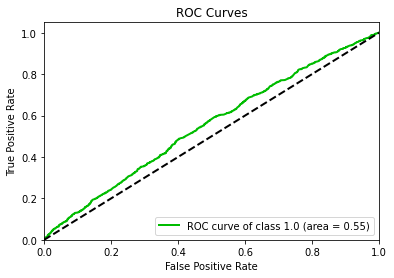

In [98]:
# ROC Curve and AUC Score

# class one
skplt.metrics.plot_roc(y_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

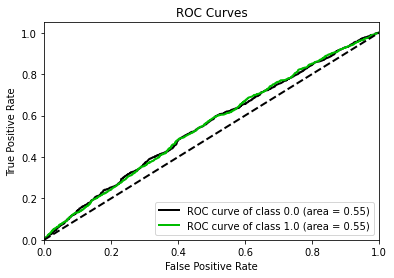

In [99]:
# both class
skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

In [100]:
AUC = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
AUC

0.5503795476684845

# Decision Tree

                                feature  importance
4                      Higher_Education    0.104709
8                          Professional    0.101982
1                                   Car    0.092724
9                            With_Child    0.084126
0                                  Male    0.081211
13                        Work_Year_2-5    0.069961
5                               Married    0.059922
14                       Work_Year_5-10    0.052853
17   Annual_Income_(100000.0, 200000.0]    0.048621
11               Age_Group_(50.0, 60.0]    0.048279
16                      Work_Year_15-50    0.042176
6                      Live_with_Parent    0.042159
18   Annual_Income_(200000.0, 300000.0]    0.038617
15                      Work_Year_10-15    0.033348
12               Age_Group_(60.0, 70.0]    0.028715
2                              Property    0.027009
3                   Income_from_Working    0.019149
7                               Working    0.013444
19  Annual_I

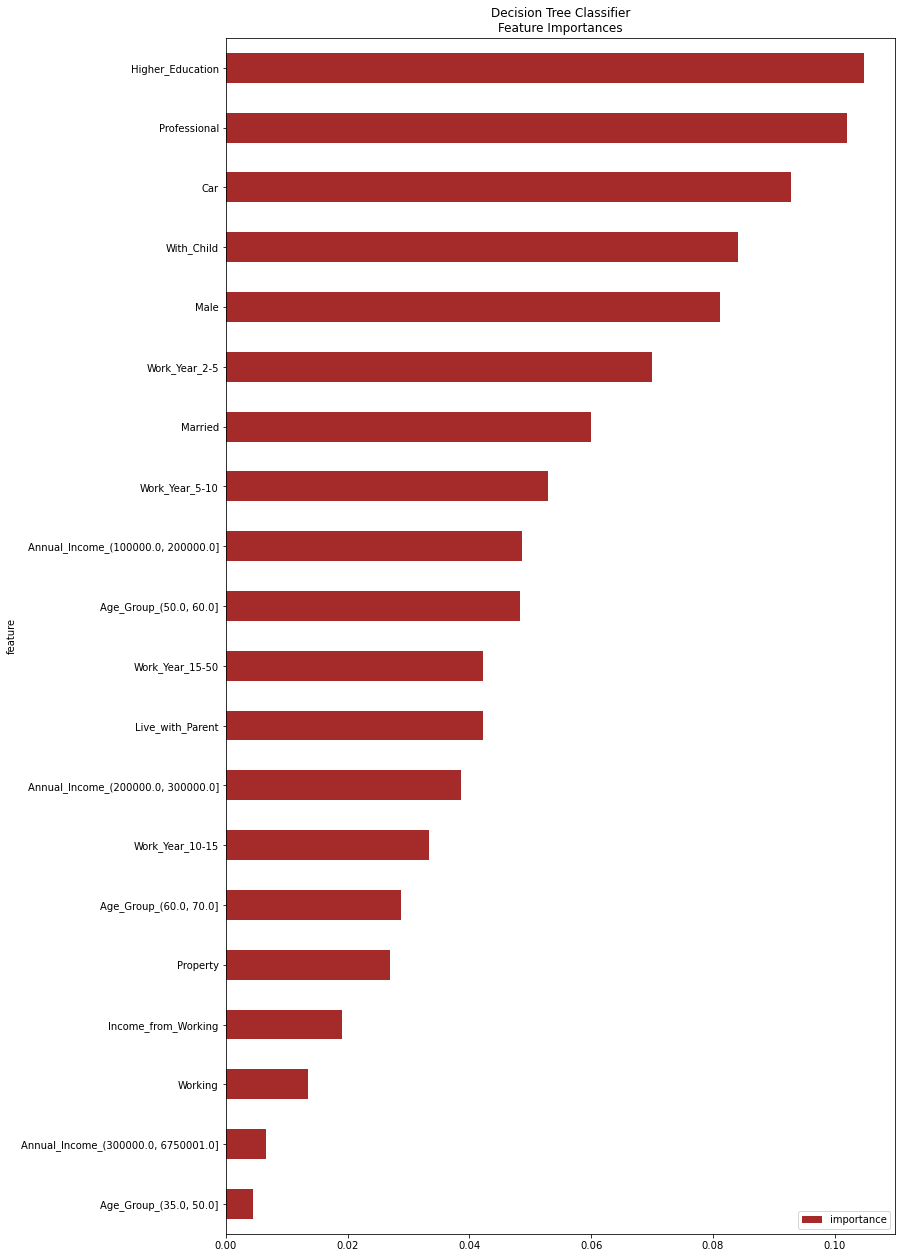

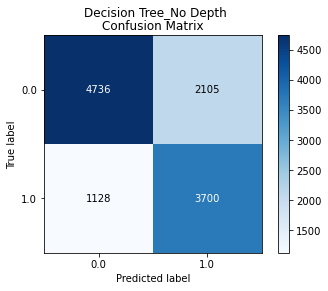

Accuracy:  0.7229411260605022
Precision Score: 0.7663628831814416
Recall Score: 0.6373815676141258
F1 Score: 0.6959465813975361


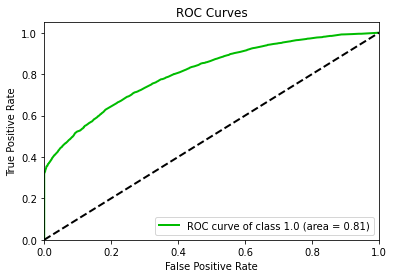

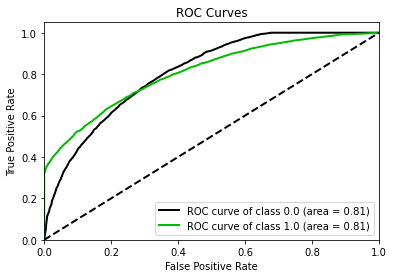

0.808969810096908

In [101]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state = 18)
clf = clf.fit(X_train, y_train)
dfz = pd.DataFrame({'feature': list(X.columns), 'importance': clf.feature_importances_}).sort_values('importance', ascending = False)
print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))

Accuracy_clf = clf.score(X_test, y_test)

print(clf.tree_.max_depth)
print(clf.tree_.node_count)
y_pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.suptitle('Decision Tree_No Depth')
plt.savefig('Decision Tree_No Depth_Confusion Matrix.png')
plt.show()
print('Accuracy: ', Accuracy_clf)
print('Precision Score:', metrics.precision_score(y_test, y_pred))
print('Recall Score:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
AUC

In [102]:
#import pydotplus
#data = tree.export_graphviz(clf, out_file=None, feature_names=list(X.columns), class_names=True, filled=True, rounded=True)
#graph = pydotplus.graph_from_dot_data(data)
#graph.write_png('Decision Tree_No Depth.png')
#graph.write_pdf('Decision Tree_No Depth.pdf')

#img=pltimg.imread('Decision Tree_No Depth.png')
#imgplot = plt.imshow(img)
#plt.show()

                                feature  importance
0                                  Male    0.091481
8                          Professional    0.085649
1                                   Car    0.082315
9                            With_Child    0.081389
2                              Property    0.079371
4                      Higher_Education    0.067020
17   Annual_Income_(100000.0, 200000.0]    0.060141
5                               Married    0.060001
18   Annual_Income_(200000.0, 300000.0]    0.053612
13                        Work_Year_2-5    0.051967
14                       Work_Year_5-10    0.051755
10               Age_Group_(35.0, 50.0]    0.045985
11               Age_Group_(50.0, 60.0]    0.039640
6                      Live_with_Parent    0.036015
16                      Work_Year_15-50    0.031348
15                      Work_Year_10-15    0.026800
19  Annual_Income_(300000.0, 6750001.0]    0.024758
12               Age_Group_(60.0, 70.0]    0.015293
3           

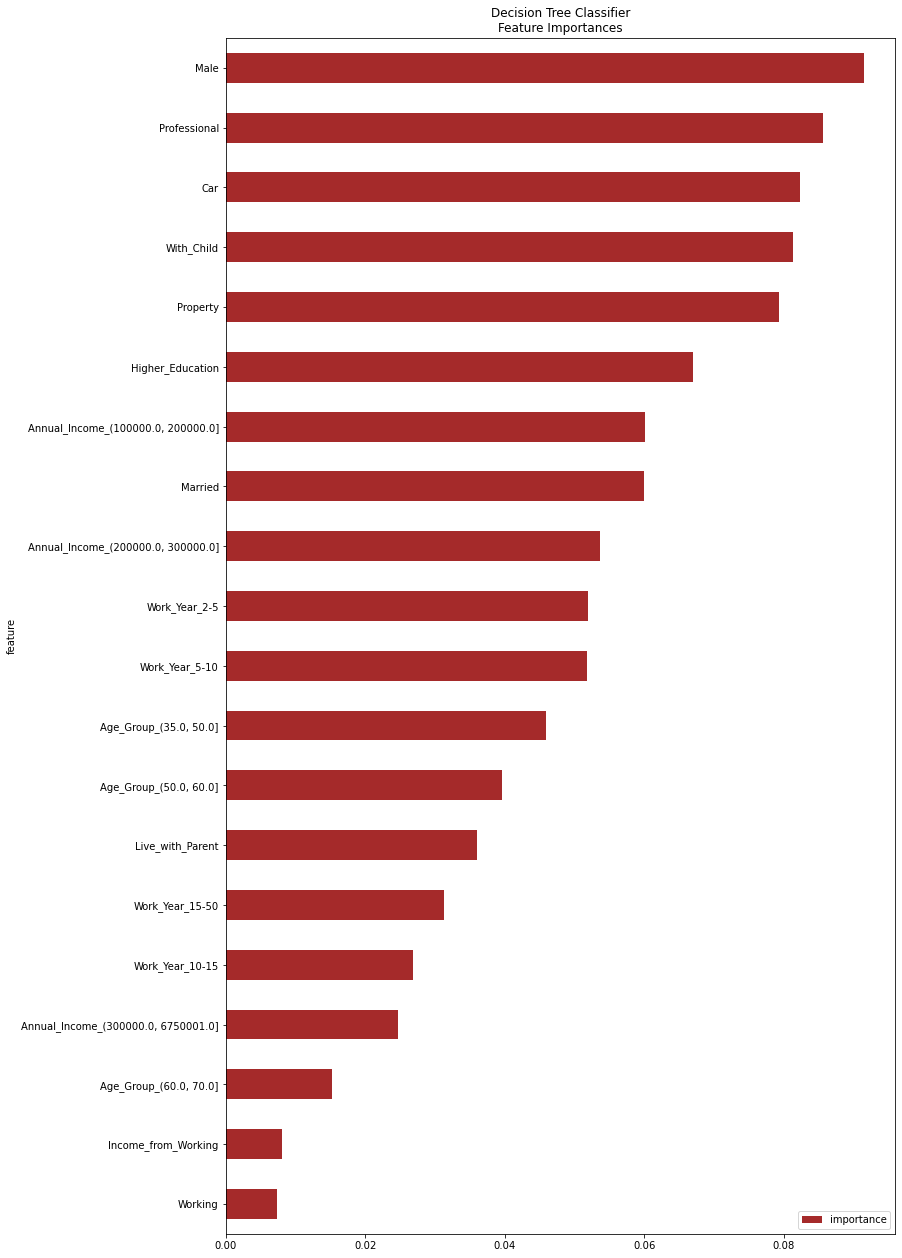

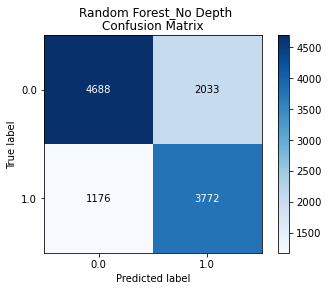

Accuracy:  0.7249978575713428
Precision Score: 0.7623282134195635
Recall Score: 0.6497846683893196
F1 Score: 0.7015716544220217


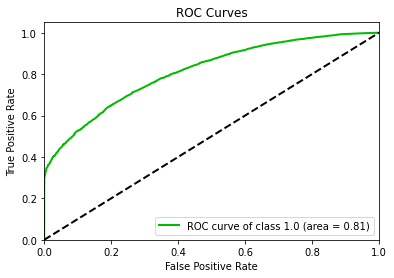

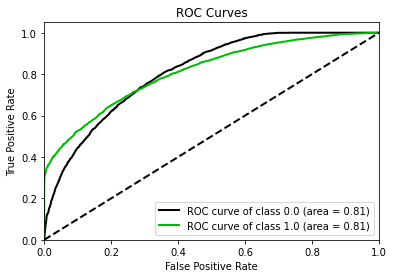

0.8119051354092122

In [103]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy',random_state = 18)
rfc = rfc.fit(X_train, y_train)
dfz = pd.DataFrame({'feature': list(X.columns), 'importance': rfc.feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))



Accuracy_rfc = rfc.score(X_test, y_test)
print(Accuracy_rfc)
y_pred_rfc = rfc.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_pred_rfc, y_test)
plt.suptitle('Random Forest_No Depth')
plt.savefig('Random Forest_No Depth_Confusion Matrix.png')
plt.show()
print('Accuracy: ', Accuracy_rfc)
print('Precision Score:', metrics.precision_score(y_test, y_pred_rfc))
print('Recall Score:', metrics.recall_score(y_test, y_pred_rfc))
print('F1 Score:', metrics.f1_score(y_test, y_pred_rfc))


y_pred_prob = rfc.predict_proba(X_test)

skplt.metrics.plot_roc(y_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
AUC

In [104]:
# check accuracy vs depth for Decision Tree

variables = locals()

for i in range(10, 20):
    print(i)
    variables["clf".format(i)] = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i,random_state = 18)
    variables["clf".format(i)] = variables["clf".format(i)].fit(X_train, y_train)
#    print(pd.DataFrame({'feature': list(X.columns), 'importance': variables["rfc".format(i)].feature_importances_}).sort_values('importance', ascending = False))
    Accuracy_Tree = variables["clf".format(i)].score(X_test, y_test)
    variables['clf'+str(i)] = variables["clf".format(17)]
    if Accuracy_Tree > 0.70:
        print('\033[1m'+ 'Accuracy', Accuracy_Tree, '\033[0m')
    else:
        print('Accuracy', Accuracy_Tree)
#    y_pred = variables["clf".format(i)].predict(X_test)
#    skplt.metrics.plot_confusion_matrix(y_pred, y_test)
#    plt.show()

10
Accuracy 0.6347587625332076
11
Accuracy 0.6518124946439283
12
Accuracy 0.677778729968292
13
Accuracy 0.6934613077384523
14
Accuracy 0.7034021767075156 
15
Accuracy 0.7130859542377239 
16
Accuracy 0.7179706915759705 
17
Accuracy 0.7217413660125118 
18
Accuracy 0.7227697317679321 
19
Accuracy 0.7229411260605022 


In [105]:
# check accuracy vs depth for Random Forest

for i in range(10, 15):
    print(i)
    variables["rfc".format(i)] = RandomForestClassifier(n_estimators=1000, criterion="entropy", max_depth=i,random_state = 18)
    variables["rfc".format(i)] = variables["rfc".format(i)].fit(X_train, y_train)
#    print(pd.DataFrame({'feature': list(X.columns), 'importance': variables["rfc".format(i)].feature_importances_}).sort_values('importance', ascending = False))
    Accuracy_Tree = variables["rfc".format(i)].score(X_test, y_test)
    variables['rfc'+str(i)] = variables["rfc".format(i)]
    if Accuracy_Tree > 0.70:
        print('\033[1m'+ 'Accuracy', Accuracy_Tree, '\033[0m')
    else:
        print('Accuracy', Accuracy_Tree)
#    y_pred = variables["clf".format(i)].predict(X_test)
#    skplt.metrics.plot_confusion_matrix(y_pred, y_test)
#    plt.show()

10
Accuracy 0.6766646670665867
11
Accuracy 0.6929471248607422
12
Accuracy 0.710686434141743 
13
Accuracy 0.7185705715999657 
14
Accuracy 0.7214842745736567 


                                feature  importance
8                          Professional    0.105141
4                      Higher_Education    0.097773
1                                   Car    0.096534
0                                  Male    0.083302
9                            With_Child    0.079941
13                        Work_Year_2-5    0.070282
5                               Married    0.060509
14                       Work_Year_5-10    0.053551
17   Annual_Income_(100000.0, 200000.0]    0.052400
11               Age_Group_(50.0, 60.0]    0.043942
6                      Live_with_Parent    0.041969
16                      Work_Year_15-50    0.041940
18   Annual_Income_(200000.0, 300000.0]    0.039605
15                      Work_Year_10-15    0.031245
12               Age_Group_(60.0, 70.0]    0.028637
2                              Property    0.028013
3                   Income_from_Working    0.017909
7                               Working    0.015291
19  Annual_I

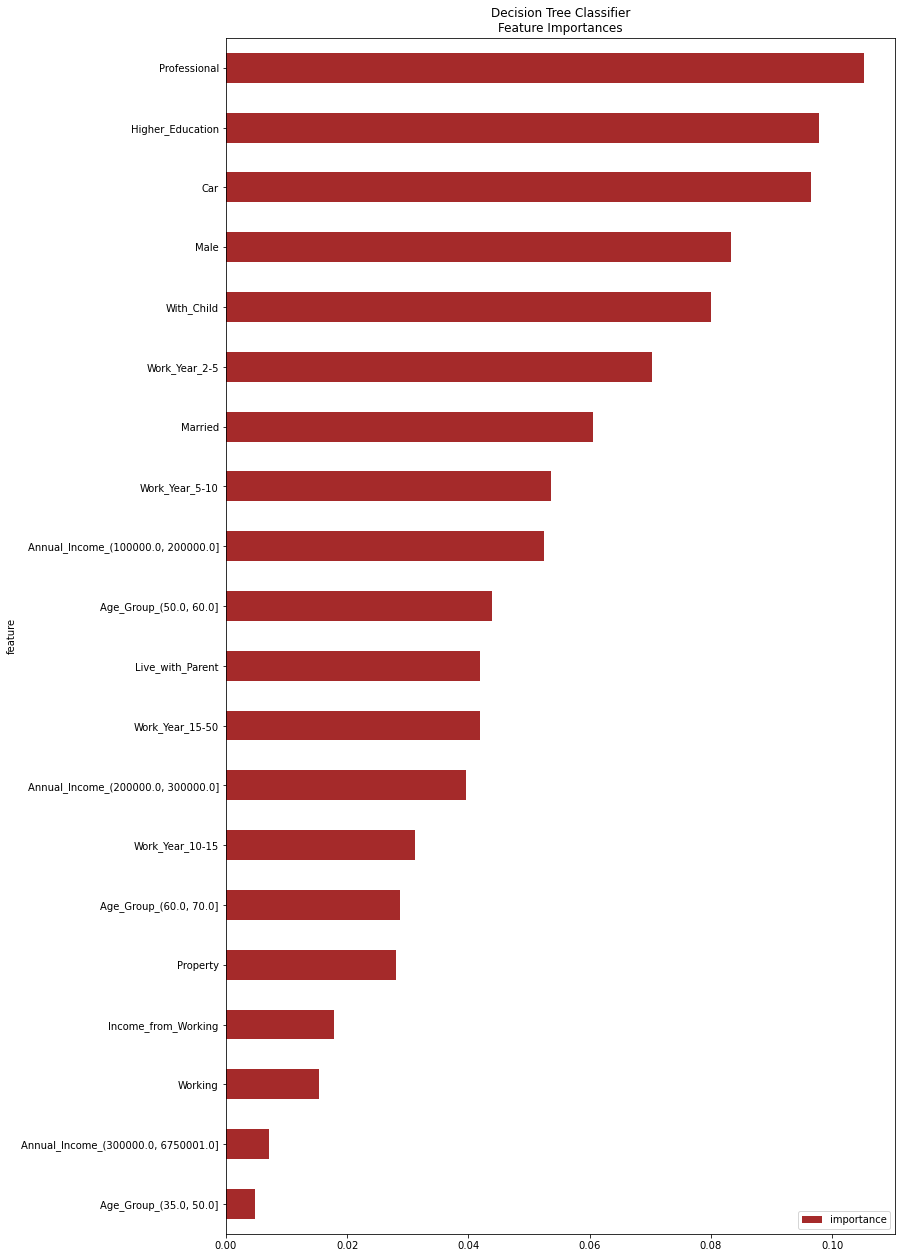

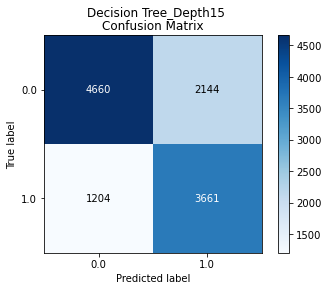

Accuracy:  0.7130859542377239
Precision Score: 0.7525179856115108
Recall Score: 0.6306632213608958
F1 Score: 0.6862230552952202


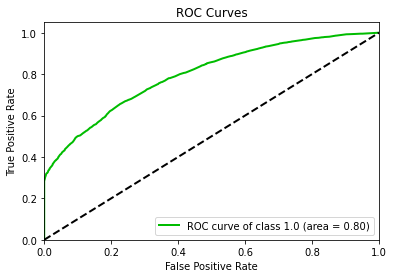

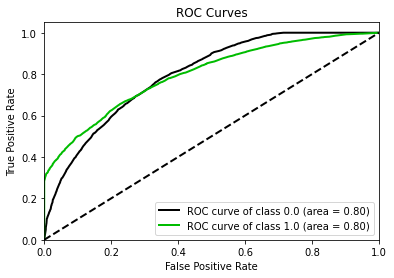

0.7973194005261963

In [106]:
# Accuracy of Decision Tree does not improve much after max_depth = n

n=15

dfz = pd.DataFrame({'feature': list(X.columns), 'importance': variables['clf'+str(n)].feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))

variables['y_pred_'+str(n)] = variables['clf'+str(n)].predict(X_test)
skplt.metrics.plot_confusion_matrix(variables['y_pred_'+str(n)], y_test)
plt.suptitle('Decision Tree_Depth'+str(n))
plt.savefig('Decision Tree_Depth'+str(n)+'_Confusion Matrix.png')
plt.show()

# Precision, Recall, F1 score
variables['Accuracy_clf'+str(n)] = variables['clf'+str(n)].score(X_test, y_test)
print('Accuracy: ', variables['Accuracy_clf'+str(n)])
print('Precision Score:', metrics.precision_score(y_test, variables['y_pred_'+str(n)]))
print('Recall Score:', metrics.recall_score(y_test, variables['y_pred_'+str(n)]))
print('F1 Score:', metrics.f1_score(y_test,variables['y_pred_'+str(n)]))


y_pred_prob = variables['clf'+str(n)].predict_proba(X_test)

skplt.metrics.plot_roc(y_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
AUC

In [107]:
#data = tree.export_graphviz(variables['clf'+str(n)], out_file=None, feature_names=list(X.columns), class_names=True, filled=True, rounded=True)
#graph = pydotplus.graph_from_dot_data(data)
#graph.write_png('Decision Tree with Depth '+str(n)+'.png')

                                feature  importance
0                                  Male    0.091177
1                                   Car    0.083456
2                              Property    0.081876
8                          Professional    0.079321
9                            With_Child    0.078757
4                      Higher_Education    0.073840
5                               Married    0.069175
17   Annual_Income_(100000.0, 200000.0]    0.056914
18   Annual_Income_(200000.0, 300000.0]    0.052958
10               Age_Group_(35.0, 50.0]    0.049082
14                       Work_Year_5-10    0.041964
13                        Work_Year_2-5    0.040804
11               Age_Group_(50.0, 60.0]    0.038625
6                      Live_with_Parent    0.034670
19  Annual_Income_(300000.0, 6750001.0]    0.032284
16                      Work_Year_15-50    0.028560
15                      Work_Year_10-15    0.025504
12               Age_Group_(60.0, 70.0]    0.019252
3           

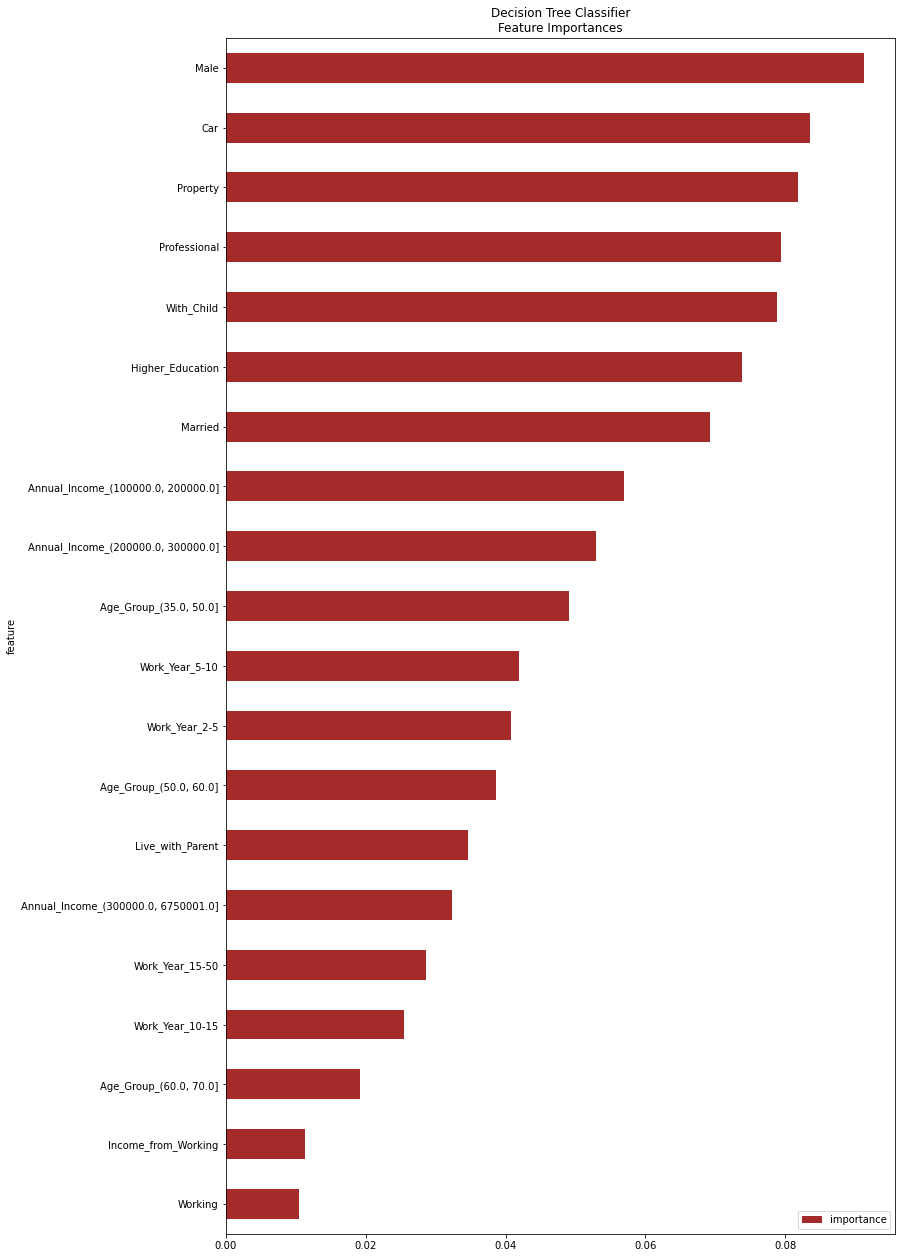

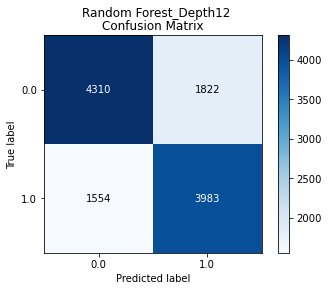

Accuracy:  0.710686434141743
Precision Score: 0.7193426042983565
Recall Score: 0.6861326442721791
F1 Score: 0.7023452653852935


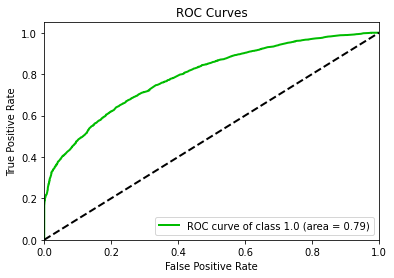

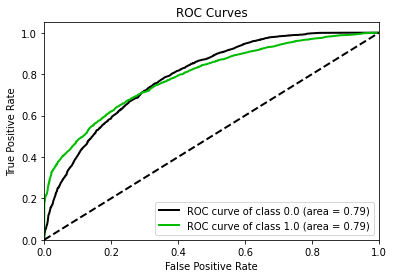

0.7916209858133777

In [108]:
# Accuracy of Random Forest does not improve much after max_depth = m

m = 12

dfz = pd.DataFrame({'feature': list(X.columns), 'importance': variables['rfc'+str(m)].feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))

variables['Accuracy_rfc'+str(m)] = variables['rfc'+str(m)].score(X_test, y_test)
variables['y_pred_rfc'+str(m)] = variables['rfc'+str(m)].predict(X_test)
skplt.metrics.plot_confusion_matrix(variables['y_pred_rfc'+str(m)], y_test)
plt.suptitle('Random Forest_Depth'+str(m))
plt.savefig('Random Forest_Depth'+str(m)+'_Confusion Matrix.png')
plt.show()

print('Accuracy: ', variables['Accuracy_rfc'+str(m)])
print('Precision Score:', metrics.precision_score(y_test, variables['y_pred_rfc'+str(m)]))
print('Recall Score:', metrics.recall_score(y_test, variables['y_pred_rfc'+str(m)]))
print('F1 Score:', metrics.f1_score(y_test,variables['y_pred_rfc'+str(m)]))


y_pred_prob = variables['rfc'+str(m)].predict_proba(X_test)

skplt.metrics.plot_roc(y_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
AUC

In [109]:
## Tree can't show all -> keep features with importances > 5%

##### 1                                   Car    0.085838
##### 5                               Married    0.084874
##### 4                      Higher_Education    0.084304
##### 2                              Property    0.083556
##### 0                                  Male    0.080453
##### 8                          Professional    0.076267
##### 9                            With_Child    0.073023

## Number of nodes is unreasonable (>4k) so we have to set the max number of nodes, in this case 200

In [110]:
#X_drop_list = Analyzelst
#X_drop_list = ['Male', 'Car', 'Property', 'Higher_Education', 'Married', 'Professional', 'With_Child',
#               'Annual_Income_(26099.999, 100000.0]', 'Annual_Income_(100000.0, 200000.0]', 
#               'Annual_Income_(200000.0, 300000.0]', 'Annual_Income_(300000.0, 6750001.0]']

X_drop = X
y_drop = y

X_drop_train, X_drop_test, y_drop_train, y_drop_test = (X_train, X_test, y_train, y_test)

                                feature  importance
8                          Professional    0.084525
0                                  Male    0.084287
4                      Higher_Education    0.078692
5                               Married    0.076776
1                                   Car    0.076068
9                            With_Child    0.071841
13                        Work_Year_2-5    0.071830
14                       Work_Year_5-10    0.056488
17   Annual_Income_(100000.0, 200000.0]    0.050292
15                      Work_Year_10-15    0.046428
16                      Work_Year_15-50    0.044634
18   Annual_Income_(200000.0, 300000.0]    0.041061
11               Age_Group_(50.0, 60.0]    0.038501
2                              Property    0.038463
6                      Live_with_Parent    0.033641
7                               Working    0.032116
19  Annual_Income_(300000.0, 6750001.0]    0.021379
12               Age_Group_(60.0, 70.0]    0.019643
3           

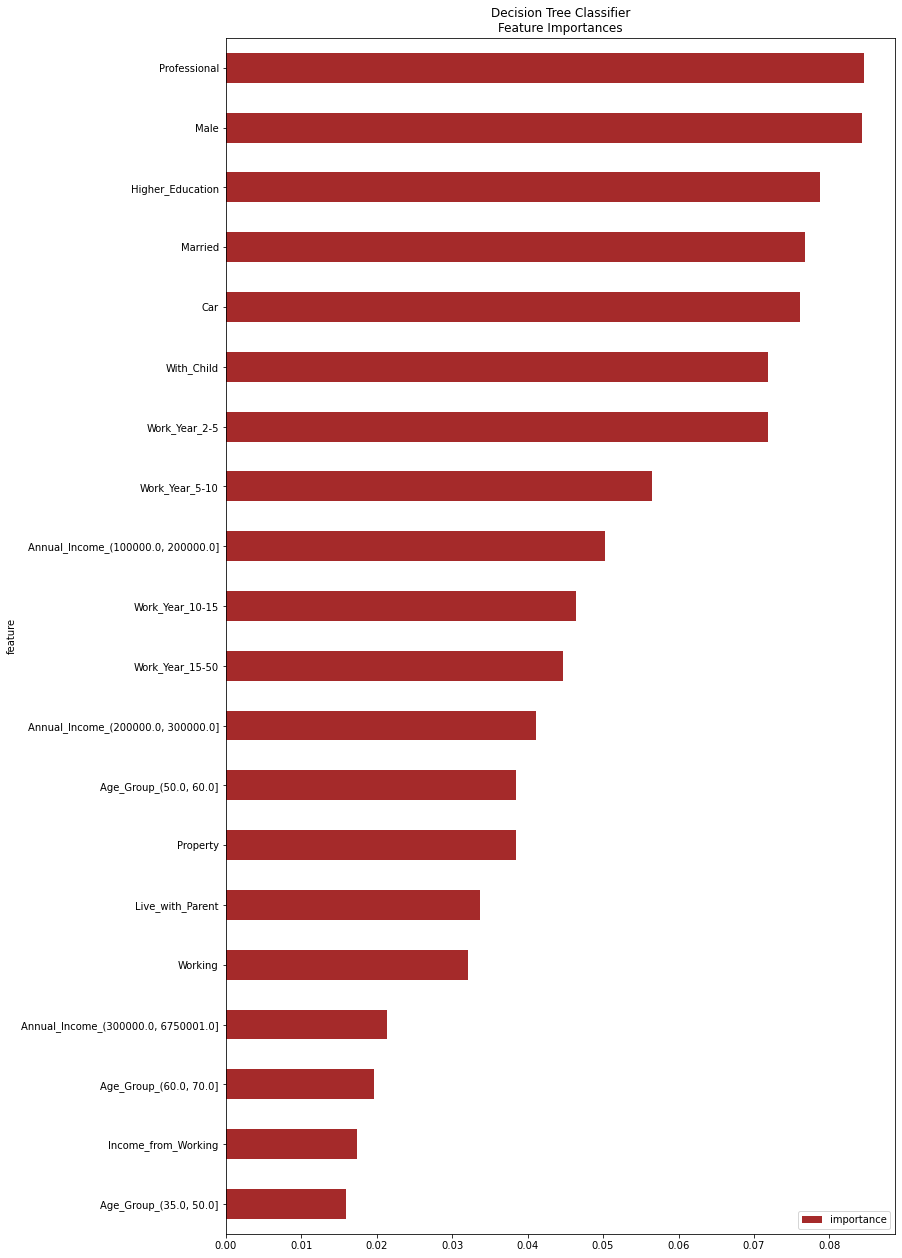

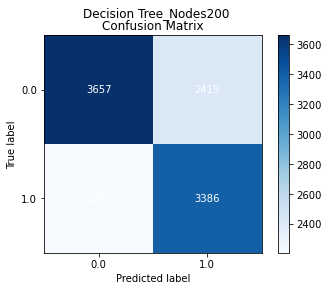

Accuracy:  0.6035650012854572
Precision Score: 0.6053996066511711
Recall Score: 0.5832902670111972
F1 Score: 0.5941393226881909


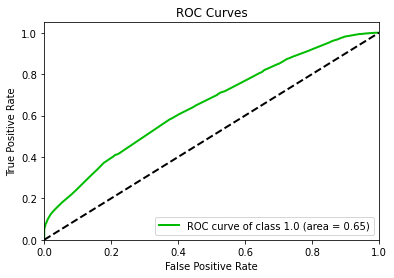

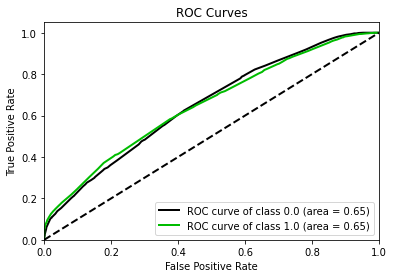

0.6511655374242227

In [111]:
clf_drop = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 200, max_depth = n, random_state = 18)
clf_drop = clf_drop.fit(X_drop_train, y_drop_train)
dfz = pd.DataFrame({'feature': list(X_drop.columns), 'importance': clf_drop.feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))

Accuracy_clf_drop = clf_drop.score(X_drop_test, y_drop_test)
print(clf_drop.tree_.max_depth)
print(clf_drop.tree_.node_count)
y_drop_pred = clf_drop.predict(X_drop_test)
skplt.metrics.plot_confusion_matrix(y_drop_pred, y_drop_test)
plt.suptitle('Decision Tree_Nodes200')
plt.savefig('Decision Tree_Nodes200_Confusion Matrix.png')
plt.show()

print('Accuracy: ', Accuracy_clf_drop)
print('Precision Score:', metrics.precision_score(y_drop_test, y_drop_pred))
print('Recall Score:', metrics.recall_score(y_drop_test, y_drop_pred))
print('F1 Score:', metrics.f1_score(y_drop_test, y_drop_pred))


y_pred_prob = clf_drop.predict_proba(X_drop_test)

skplt.metrics.plot_roc(y_drop_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_drop_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_drop_test, y_pred_prob[:,1])
AUC

In [112]:
#data = tree.export_graphviz(clf_drop, out_file=None, feature_names=(X_drop.columns), class_names=True, filled=True, rounded=True)
#graph = pydotplus.graph_from_dot_data(data)
#graph.write_png('Decision Tree_drop.png')

                                feature  importance
0                                  Male    0.075355
9                            With_Child    0.075058
2                              Property    0.071057
8                          Professional    0.069653
5                               Married    0.069643
1                                   Car    0.068593
4                      Higher_Education    0.068225
10               Age_Group_(35.0, 50.0]    0.057992
17   Annual_Income_(100000.0, 200000.0]    0.052766
18   Annual_Income_(200000.0, 300000.0]    0.050384
14                       Work_Year_5-10    0.047611
13                        Work_Year_2-5    0.047203
19  Annual_Income_(300000.0, 6750001.0]    0.043010
11               Age_Group_(50.0, 60.0]    0.041551
15                      Work_Year_10-15    0.035597
6                      Live_with_Parent    0.033580
16                      Work_Year_15-50    0.033394
12               Age_Group_(60.0, 70.0]    0.025254
3           

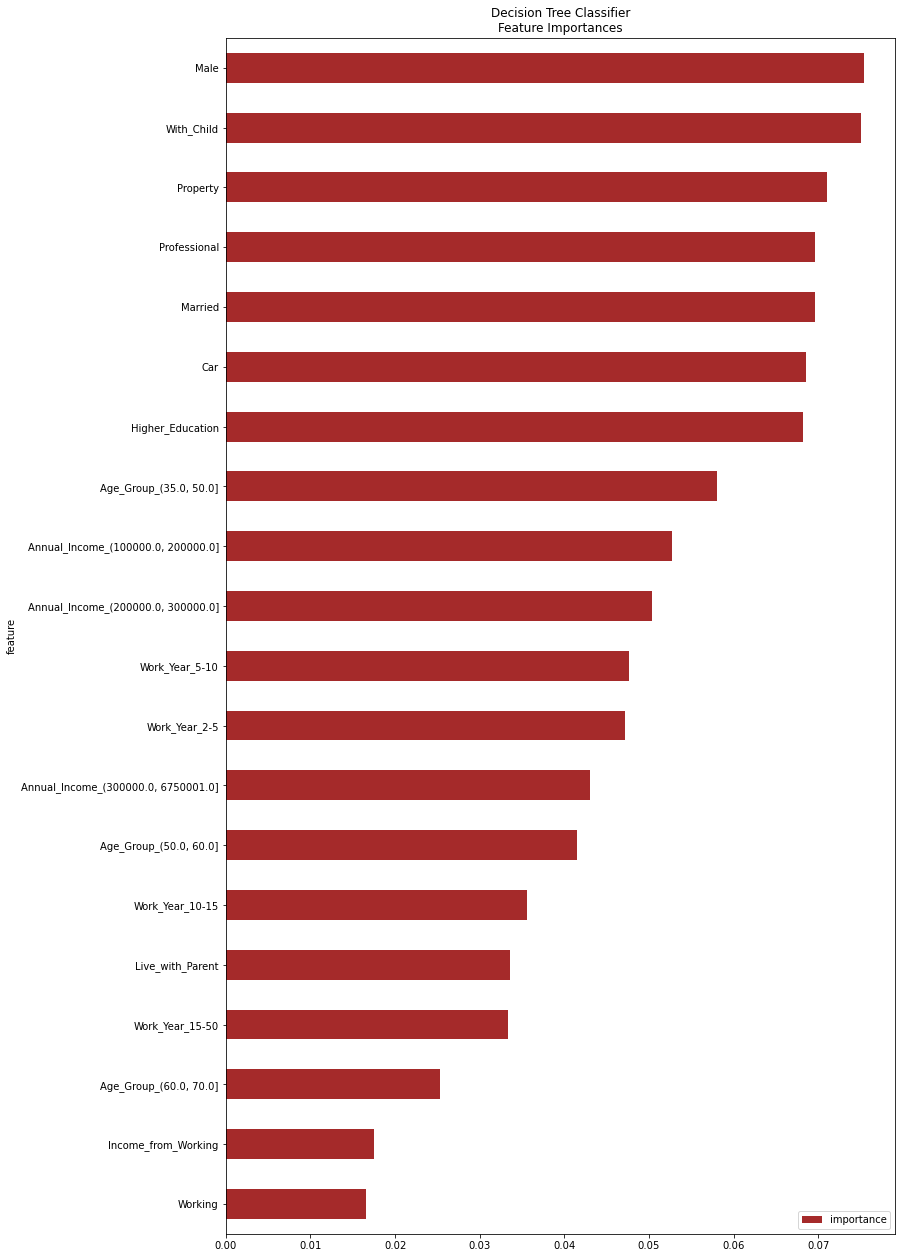

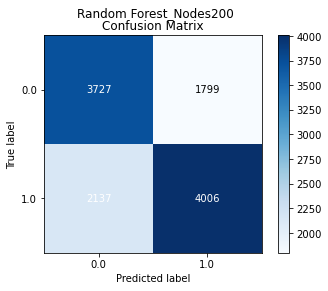

Accuracy:  0.662696032222127
Precision Score: 0.6521243692007163
Recall Score: 0.6900947459086993
F1 Score: 0.6705724807499163


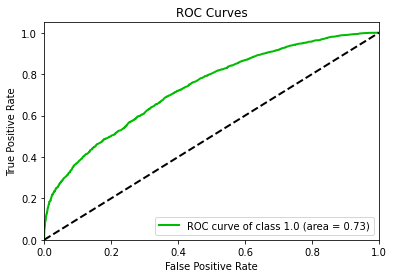

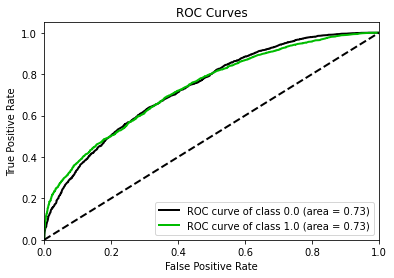

0.7342786479172468

In [113]:
rfc_drop = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_leaf_nodes = 200, max_depth = m,random_state = 18)
rfc_drop = rfc_drop.fit(X_drop_train, y_drop_train)
dfz = pd.DataFrame({'feature': list(X_drop.columns), 'importance': rfc_drop.feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))

Accuracy_rfc_drop = rfc_drop.score(X_drop_test, y_drop_test)

y_drop_pred_rfc = rfc_drop.predict(X_drop_test)
skplt.metrics.plot_confusion_matrix(y_drop_pred_rfc, y_drop_test)
plt.suptitle('Random Forest_Nodes200')
plt.savefig('Random Forest_Nodes200_Confusion Matrix.png')
plt.show()

print('Accuracy: ', Accuracy_rfc_drop)
print('Precision Score:', metrics.precision_score(y_drop_test, y_drop_pred_rfc))
print('Recall Score:', metrics.recall_score(y_drop_test, y_drop_pred_rfc))
print('F1 Score:', metrics.f1_score(y_drop_test, y_drop_pred_rfc))


y_pred_prob = rfc_drop.predict_proba(X_drop_test)

skplt.metrics.plot_roc(y_drop_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_drop_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_drop_test, y_pred_prob[:,1])
AUC

# To see if the tree can be further pruned by ccp alpha

In [114]:
clf_ccp = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 200, max_depth = n,random_state = 18)
path = clf_ccp.cost_complexity_pruning_path(X_drop_train, y_drop_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

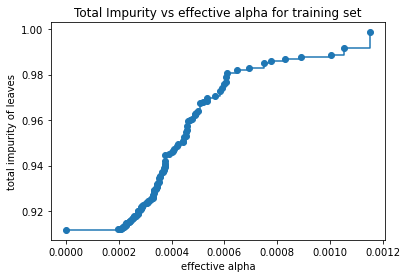

In [115]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [116]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 200, max_depth = 14, ccp_alpha=ccp_alpha,random_state = 18)
    clf.fit(X_drop_train, y_drop_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.0014105926845829897


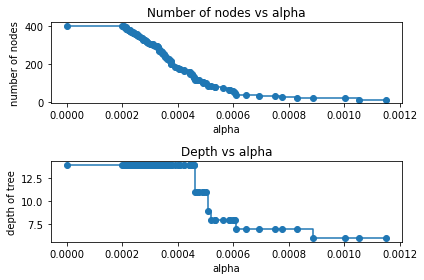

In [117]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


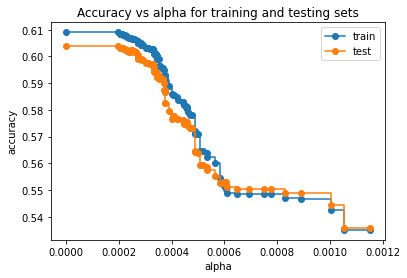

In [118]:
train_scores = [clf.score(X_drop_train, y_drop_train) for clf in clfs]
test_scores = [clf.score(X_drop_test, y_drop_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


                                feature  importance
4                      Higher_Education    0.089653
5                               Married    0.084710
8                          Professional    0.080760
0                                  Male    0.080349
1                                   Car    0.079895
9                            With_Child    0.074537
13                        Work_Year_2-5    0.064248
14                       Work_Year_5-10    0.054325
17   Annual_Income_(100000.0, 200000.0]    0.054206
18   Annual_Income_(200000.0, 300000.0]    0.046781
15                      Work_Year_10-15    0.046330
16                      Work_Year_15-50    0.043512
2                              Property    0.038404
11               Age_Group_(50.0, 60.0]    0.036790
7                               Working    0.030698
12               Age_Group_(60.0, 70.0]    0.022379
19  Annual_Income_(300000.0, 6750001.0]    0.021557
10               Age_Group_(35.0, 50.0]    0.018198
6           

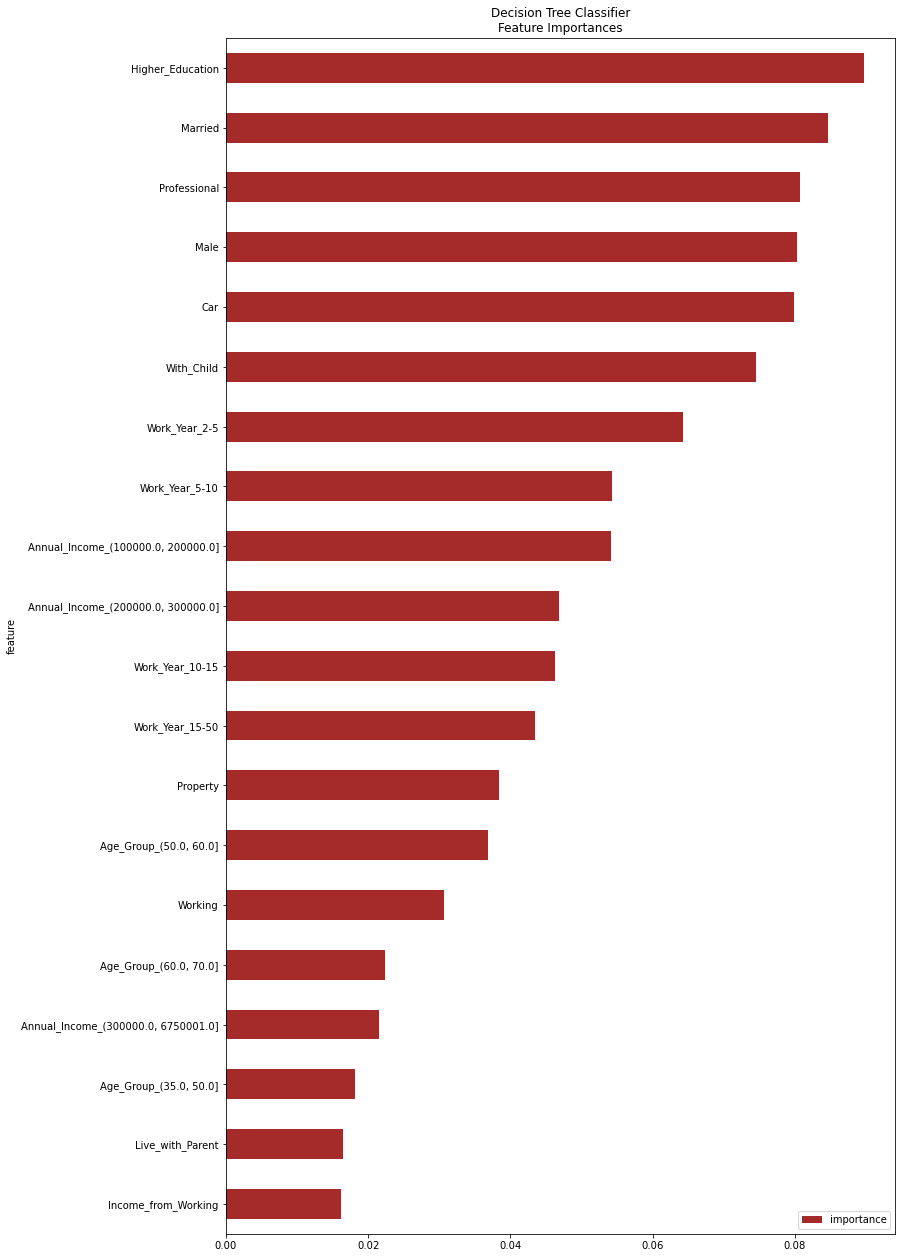

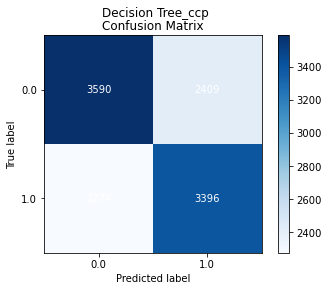

Accuracy:  0.5986802639472105
Precision Score: 0.5989417989417989
Recall Score: 0.5850129198966408
F1 Score: 0.5918954248366012


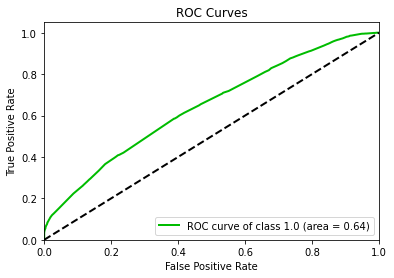

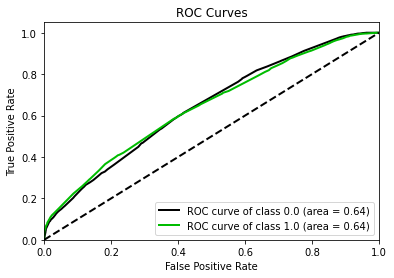

0.643846583424695

In [119]:
clf_ccp = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 200, max_depth = n, ccp_alpha=0.0003,random_state = 18)
clf_ccp = clf_ccp.fit(X_drop_train, y_drop_train)
dfz = pd.DataFrame({'feature': list(X_drop.columns), 'importance': clf_ccp.feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))

Accuracy_clf_ccp = clf_ccp.score(X_drop_test, y_drop_test)

print(clf_ccp.tree_.max_depth)
print(clf_ccp.tree_.node_count)
y_ccp_pred = clf_ccp.predict(X_drop_test)
skplt.metrics.plot_confusion_matrix(y_ccp_pred, y_drop_test)
plt.suptitle('Decision Tree_ccp')
plt.savefig('Decision Tree_ccp_Confusion Matrix.png')
plt.show()

print('Accuracy: ', Accuracy_clf_ccp)
print('Precision Score:', metrics.precision_score(y_drop_test, y_ccp_pred))
print('Recall Score:', metrics.recall_score(y_drop_test, y_ccp_pred))
print('F1 Score:', metrics.f1_score(y_drop_test, y_ccp_pred))

y_pred_prob = clf_ccp.predict_proba(X_drop_test)

skplt.metrics.plot_roc(y_drop_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_drop_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_drop_test, y_pred_prob[:,1])
AUC

In [120]:
#data = tree.export_graphviz(clf_ccp, out_file=None, feature_names=list(X_drop.columns), class_names=True, filled=True, rounded=True)
#graph = pydotplus.graph_from_dot_data(data)
#graph.write_png('Decision Tree_ccp.png')

                                feature  importance
5                               Married    0.076409
9                            With_Child    0.072953
2                              Property    0.069545
10               Age_Group_(35.0, 50.0]    0.068496
4                      Higher_Education    0.067309
8                          Professional    0.064213
0                                  Male    0.063076
1                                   Car    0.060814
17   Annual_Income_(100000.0, 200000.0]    0.051713
19  Annual_Income_(300000.0, 6750001.0]    0.051301
14                       Work_Year_5-10    0.051009
13                        Work_Year_2-5    0.050967
18   Annual_Income_(200000.0, 300000.0]    0.049003
15                      Work_Year_10-15    0.042525
11               Age_Group_(50.0, 60.0]    0.039296
16                      Work_Year_15-50    0.032300
12               Age_Group_(60.0, 70.0]    0.025843
6                      Live_with_Parent    0.024699
3           

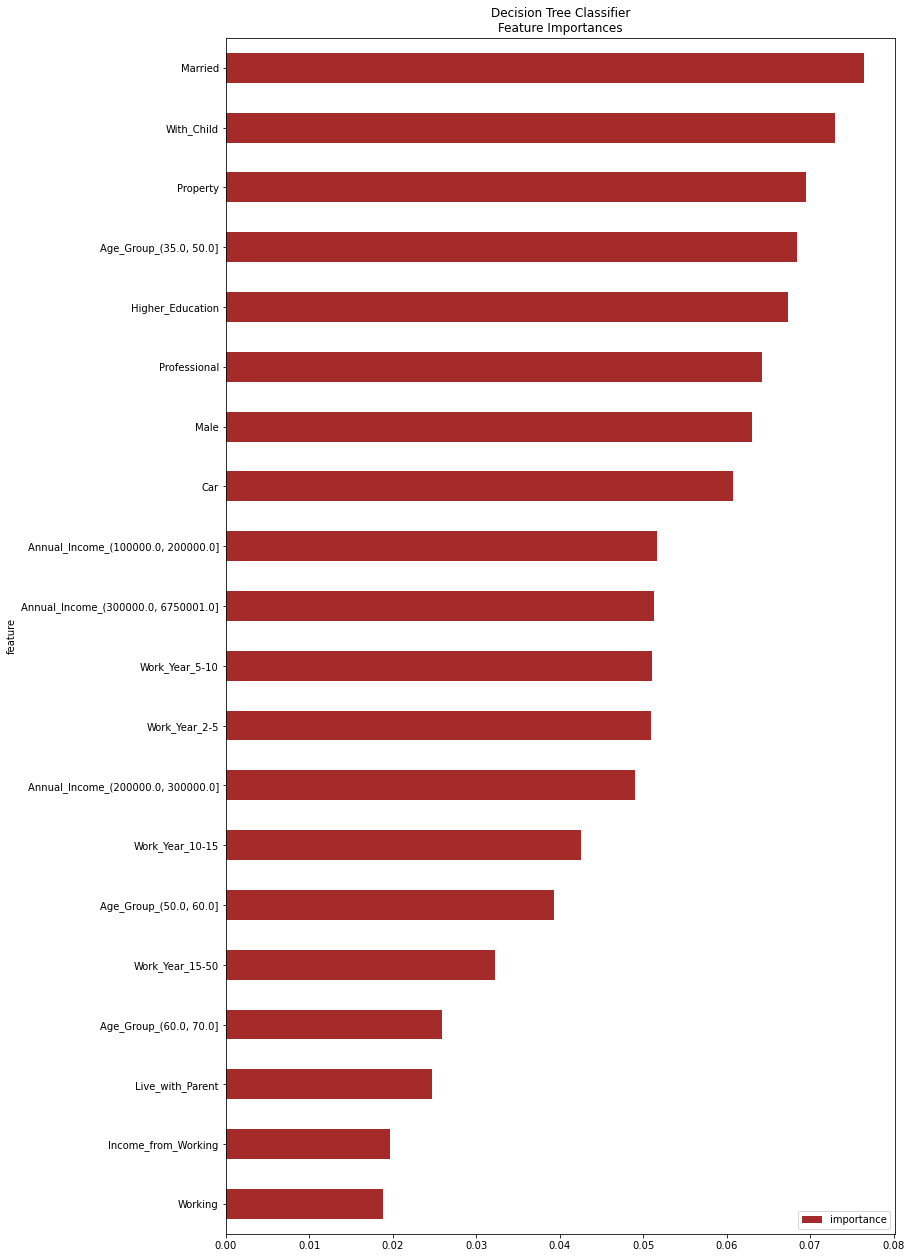

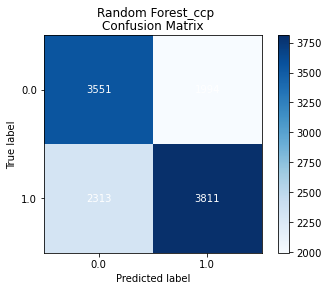

Accuracy:  0.6309023909503814
Precision Score: 0.6223056825604181
Recall Score: 0.6565030146425496
F1 Score: 0.6389471036968732


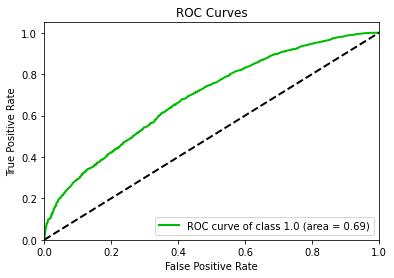

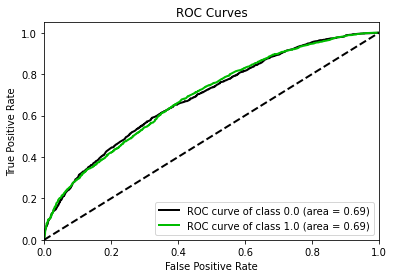

0.6890763419595236

In [121]:
rfc_ccp = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_leaf_nodes = 200, max_depth = m,ccp_alpha=0.0003,random_state = 18)
rfc_ccp = rfc_ccp.fit(X_drop_train, y_drop_train)
dfz = pd.DataFrame({'feature': list(X_drop.columns), 'importance': rfc_ccp.feature_importances_}).sort_values('importance', ascending = False)

print (dfz)
dfz.sort_values('importance', inplace = True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importance',x='feature',color='brown', figsize=(12,22))


Accuracy_rfc_ccp = rfc_ccp.score(X_drop_test, y_drop_test)

y_ccp_pred_rfc = rfc_ccp.predict(X_drop_test)
skplt.metrics.plot_confusion_matrix(y_ccp_pred_rfc, y_drop_test)
plt.suptitle('Random Forest_ccp')
plt.savefig('Random Forest_ccp_Confusion Matrix.png')
plt.show()

print('Accuracy: ', Accuracy_rfc_ccp)
print('Precision Score:', metrics.precision_score(y_drop_test, y_ccp_pred_rfc))
print('Recall Score:', metrics.recall_score(y_drop_test, y_ccp_pred_rfc))
print('F1 Score:', metrics.f1_score(y_drop_test, y_ccp_pred_rfc))


y_pred_prob = rfc_ccp.predict_proba(X_test)

skplt.metrics.plot_roc(y_test,y_pred_prob,plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()

skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False)
plt.show()

AUC = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
AUC

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_drop_test, y_ccp_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.64      0.61      0.62      5864
         1.0       0.62      0.66      0.64      5805

    accuracy                           0.63     11669
   macro avg       0.63      0.63      0.63     11669
weighted avg       0.63      0.63      0.63     11669

